In [2]:
library("ggplot2")
library("DataExplorer")
library("caret") # split the data
library("glmnet") # lasso
library("pROC") # draw ROC
library("rpart") # decision tree
library("rpart.plot") # draw decision tree
library("party") # conditional inference tree
library("purrr") # map_chr
library("randomForest")
library("e1071") # SVM

Warning message:
"package 'ggplot2' was built under R version 3.5.3"Warning message:
"package 'DataExplorer' was built under R version 3.5.3"Warning message:
"package 'caret' was built under R version 3.5.3"Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.5.3"Warning message:
"package 'glmnet' was built under R version 3.5.3"Loading required package: Matrix
Warning message:
"package 'Matrix' was built under R version 3.5.3"Loading required package: foreach
Loaded glmnet 2.0-18

Warning message:
"package 'pROC' was built under R version 3.5.3"Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following object is masked from 'package:glmnet':

    auc

The following objects are masked from 'package:stats':

    cov, smooth, var

Warning message:
"package 'rpart' was built under R version 3.5.3"Warning message:
"package 'rpart.plot' was built under R version 3.5.3"Warning message:
"package 'party' was built under R vers

In [3]:
# import the data
setwd("D://ESCP Europe//Analytical Modelling//EXAM")
creditdata <- read.csv("Exam2019- Dataset.csv", header = TRUE)
head(creditdata)

Default,checkingstatus1,duration,history,purpose,amount,savings,employ,installment,status,...,residence,property,age,otherplans,housing,cards,job,liable,tele,foreign
<int>,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<int>,<fct>,...,<int>,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<int>,<fct>,<fct>
0,A11,6,A34,A43,1169,A65,A75,4,A93,...,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,...,2,A121,22,A143,A152,1,A173,1,A191,A201
0,A14,12,A34,A46,2096,A61,A74,2,A93,...,3,A121,49,A143,A152,1,A172,2,A191,A201
0,A11,42,A32,A42,7882,A61,A74,2,A93,...,4,A122,45,A143,A153,1,A173,2,A191,A201
1,A11,24,A33,A40,4870,A61,A73,3,A93,...,4,A124,53,A143,A153,2,A173,2,A191,A201
0,A14,36,A32,A46,9055,A65,A73,2,A93,...,4,A124,35,A143,A153,1,A172,2,A192,A201


In [4]:
# check the data type
str(creditdata)

'data.frame':	1000 obs. of  21 variables:
 $ Default        : int  0 1 0 0 1 0 0 0 0 1 ...
 $ checkingstatus1: Factor w/ 4 levels "A11","A12","A13",..: 1 2 4 1 1 4 4 2 4 2 ...
 $ duration       : int  6 48 12 42 24 36 24 36 12 30 ...
 $ history        : Factor w/ 5 levels "A30","A31","A32",..: 5 3 5 3 4 3 3 3 3 5 ...
 $ purpose        : Factor w/ 10 levels "A40","A41","A410",..: 5 5 8 4 1 8 4 2 5 1 ...
 $ amount         : int  1169 5951 2096 7882 4870 9055 2835 6948 3059 5234 ...
 $ savings        : Factor w/ 5 levels "A61","A62","A63",..: 5 1 1 1 1 5 3 1 4 1 ...
 $ employ         : Factor w/ 5 levels "A71","A72","A73",..: 5 3 4 4 3 3 5 3 4 1 ...
 $ installment    : int  4 2 2 2 3 2 3 2 2 4 ...
 $ status         : Factor w/ 4 levels "A91","A92","A93",..: 3 2 3 3 3 3 3 3 1 4 ...
 $ others         : Factor w/ 3 levels "A101","A102",..: 1 1 1 3 1 1 1 1 1 1 ...
 $ residence      : int  4 2 3 4 4 4 4 2 4 2 ...
 $ property       : Factor w/ 4 levels "A121","A122",..: 1 1 1 2 4 4 2 3 1 3 ...


In [5]:
# check if there are any missing values
sapply(creditdata, function(x) sum(is.na(x)))

Default checkingstatus1        duration         history         purpose 
              0               0               0               0               0 
         amount         savings          employ     installment          status 
              0               0               0               0               0 
         others       residence        property             age      otherplans 
              0               0               0               0               0 
        housing           cards             job          liable            tele 
              0               0               0               0               0 
        foreign 
              0

In [6]:
# format data
creditdata$Default <- as.factor(creditdata$Default)
creditdata$cards <- as.factor(creditdata$cards)
str(creditdata)

'data.frame':	1000 obs. of  21 variables:
 $ Default        : Factor w/ 2 levels "0","1": 1 2 1 1 2 1 1 1 1 2 ...
 $ checkingstatus1: Factor w/ 4 levels "A11","A12","A13",..: 1 2 4 1 1 4 4 2 4 2 ...
 $ duration       : int  6 48 12 42 24 36 24 36 12 30 ...
 $ history        : Factor w/ 5 levels "A30","A31","A32",..: 5 3 5 3 4 3 3 3 3 5 ...
 $ purpose        : Factor w/ 10 levels "A40","A41","A410",..: 5 5 8 4 1 8 4 2 5 1 ...
 $ amount         : int  1169 5951 2096 7882 4870 9055 2835 6948 3059 5234 ...
 $ savings        : Factor w/ 5 levels "A61","A62","A63",..: 5 1 1 1 1 5 3 1 4 1 ...
 $ employ         : Factor w/ 5 levels "A71","A72","A73",..: 5 3 4 4 3 3 5 3 4 1 ...
 $ installment    : int  4 2 2 2 3 2 3 2 2 4 ...
 $ status         : Factor w/ 4 levels "A91","A92","A93",..: 3 2 3 3 3 3 3 3 1 4 ...
 $ others         : Factor w/ 3 levels "A101","A102",..: 1 1 1 3 1 1 1 1 1 1 ...
 $ residence      : int  4 2 3 4 4 4 4 2 4 2 ...
 $ property       : Factor w/ 4 levels "A121","A122",..: 1

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    4.0    12.0    18.0    20.9    24.0    72.0 

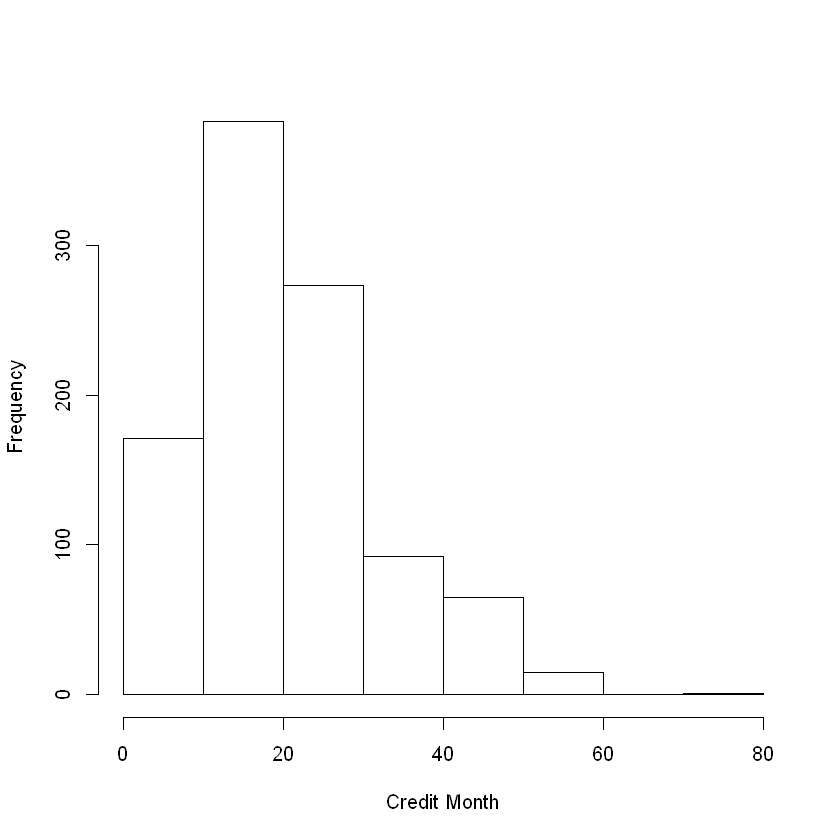

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    250    1366    2320    3271    3972   18424 

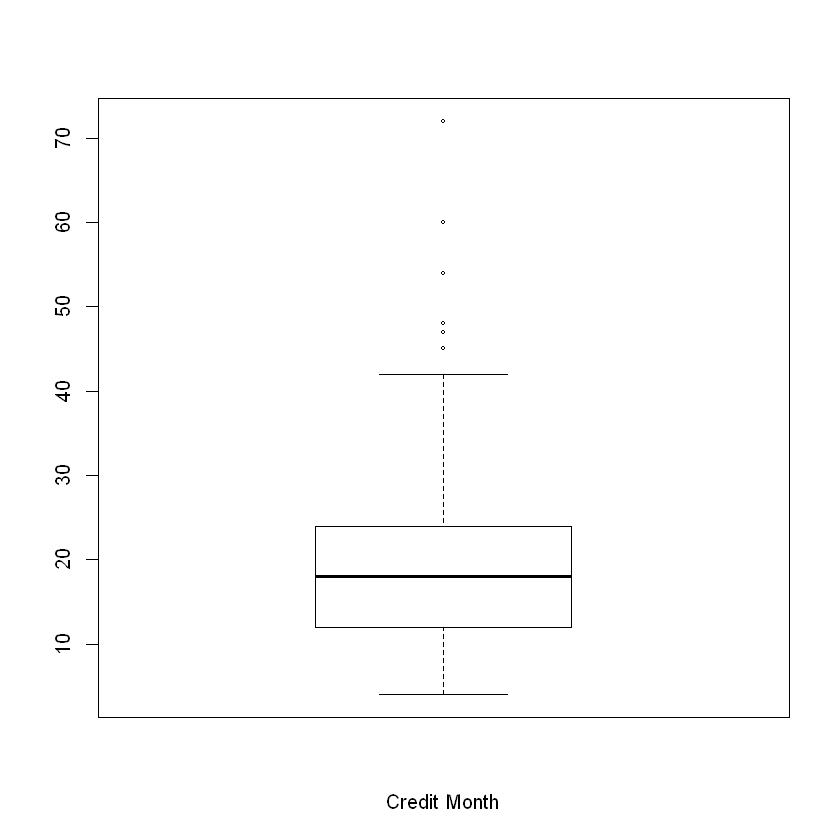

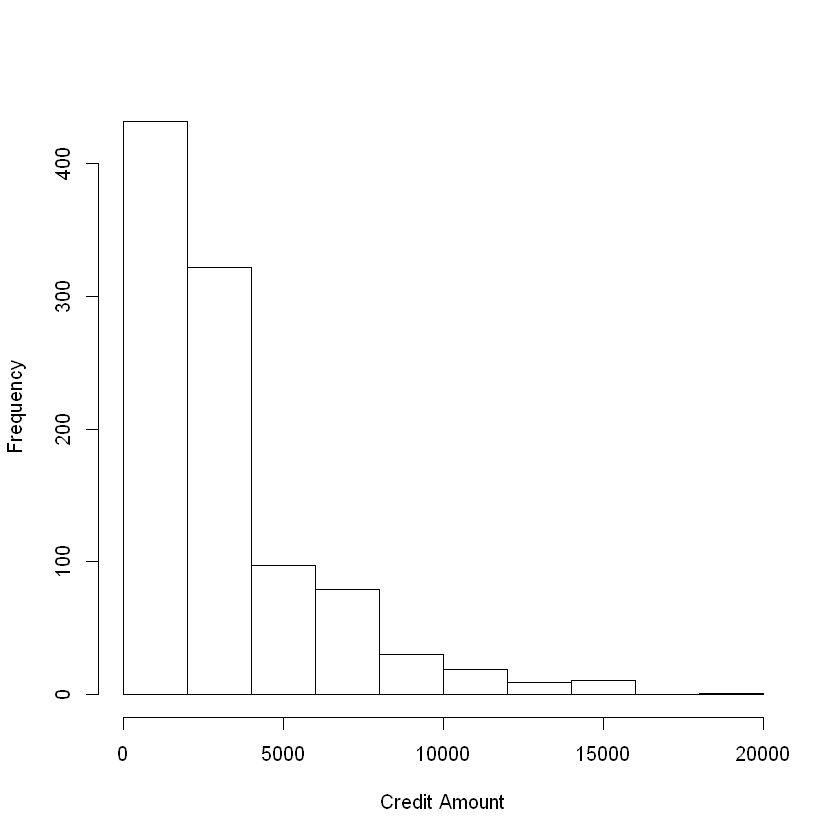

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  19.00   27.00   33.00   35.55   42.00   75.00 

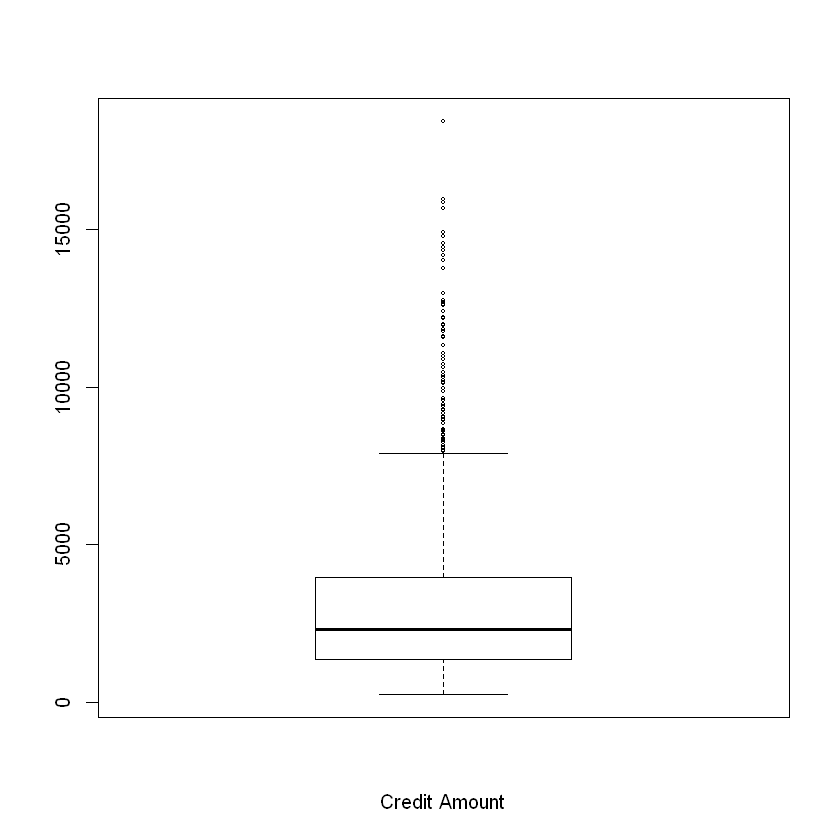

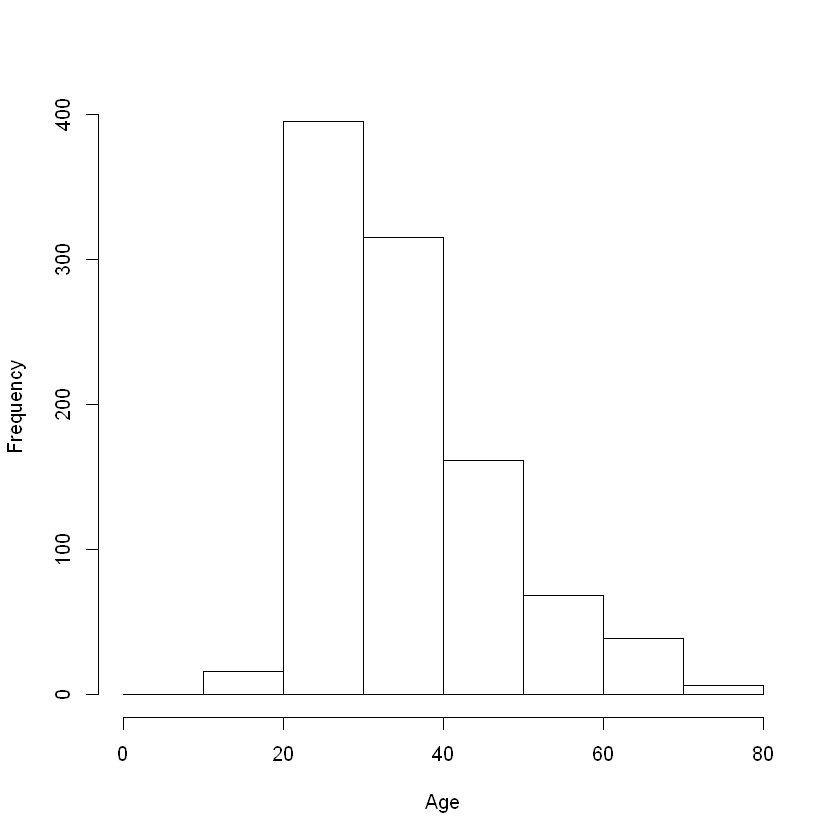

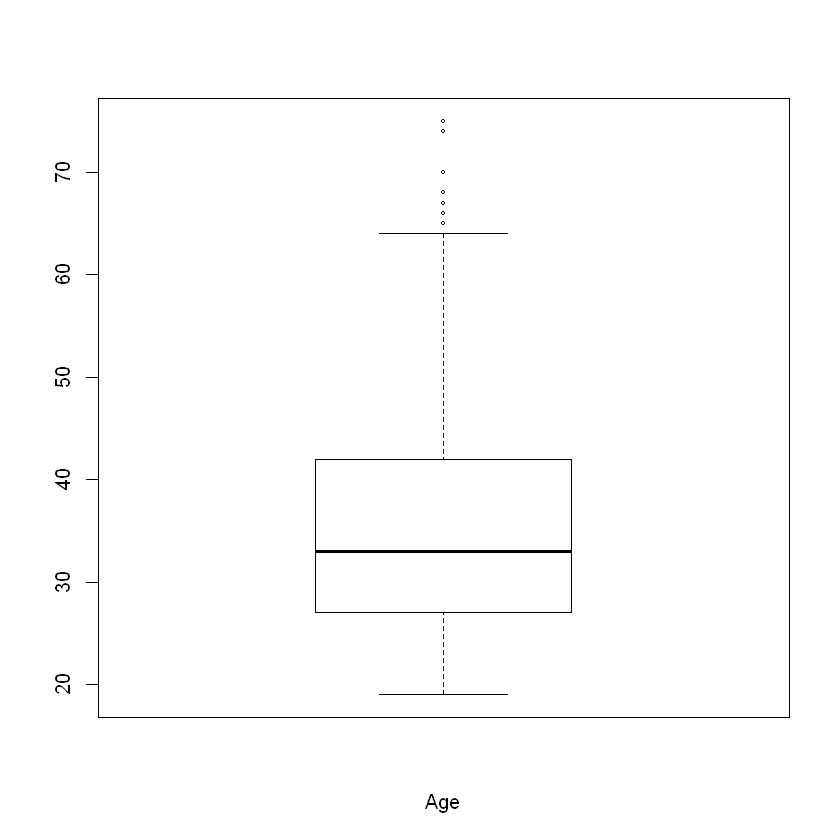

In [7]:
# explore continous data
attach(creditdata) 
summary(duration)
brksCredit <- seq(0, 80, 10) 
hist(duration, breaks=brksCredit, xlab = "Credit Month", ylab = "Frequency", main = " ", cex=0.4)
boxplot(duration, bty="n",xlab = "Credit Month", cex=0.4)

summary(amount)
hist(amount, xlab = "Credit Amount", ylab = "Frequency", main = " ", cex=0.4) # produces nice looking histogram
boxplot(amount, bty="n",xlab = "Credit Amount", cex=0.4)

summary(age)
hist(age, breaks=brksCredit, xlab = "Age", ylab = "Frequency", main = " ", cex=0.4) # produces nice looking histogram
boxplot(age, bty="n",xlab = "Age", cex=0.4)


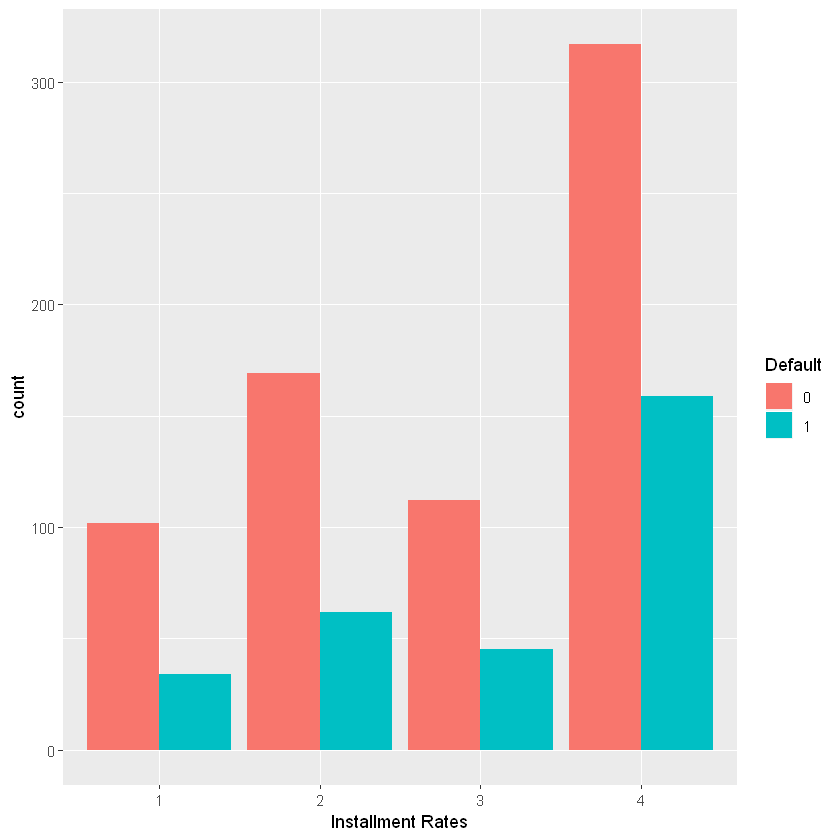

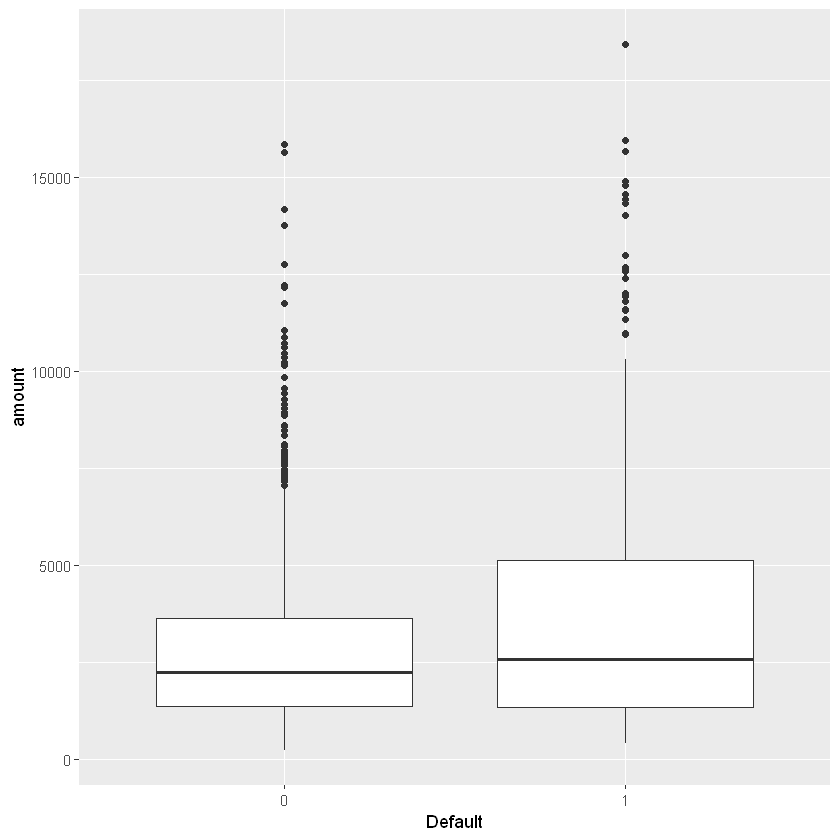

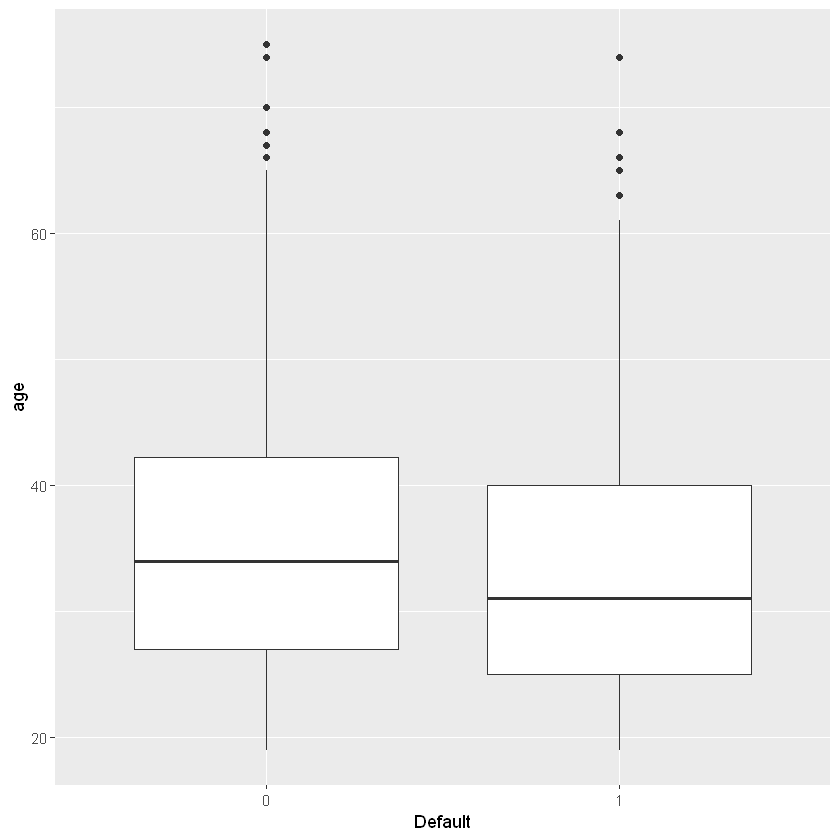

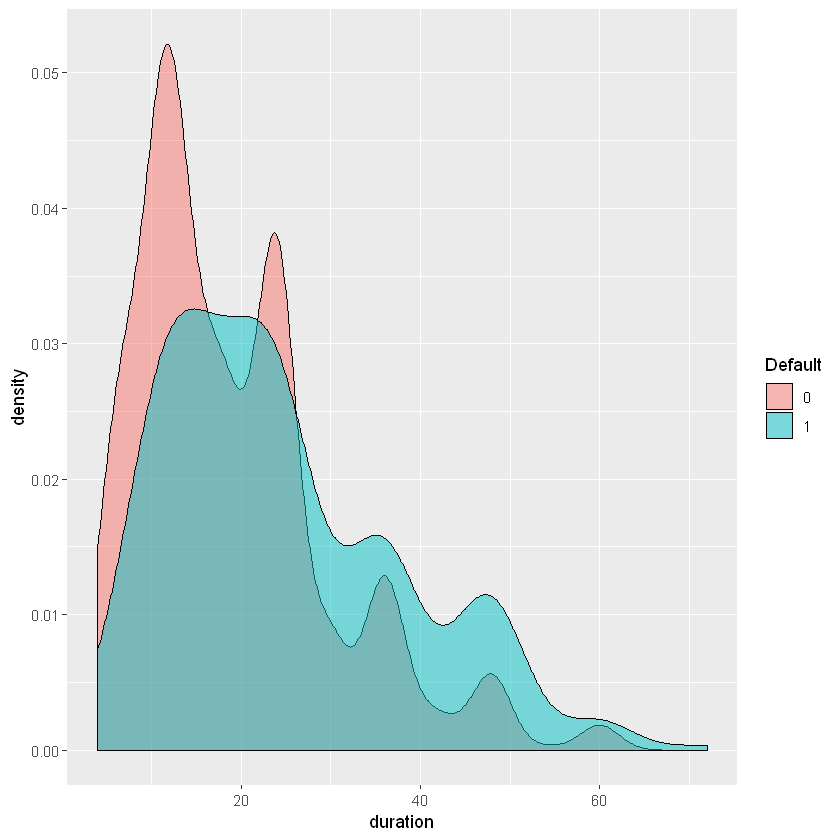

Warning message:
"Ignoring unknown parameters: aposition"

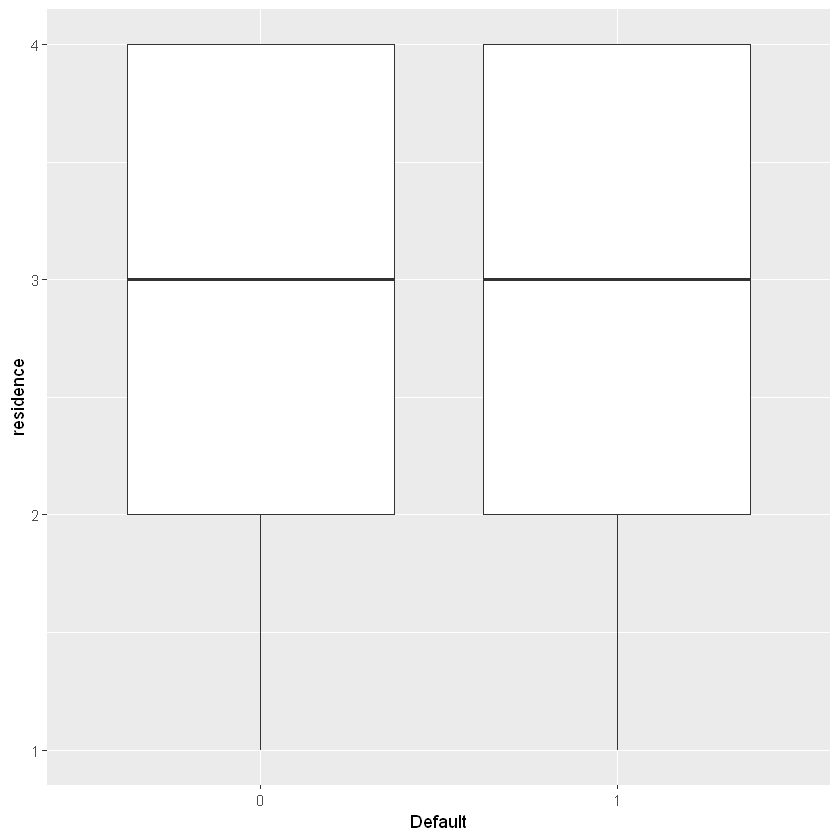

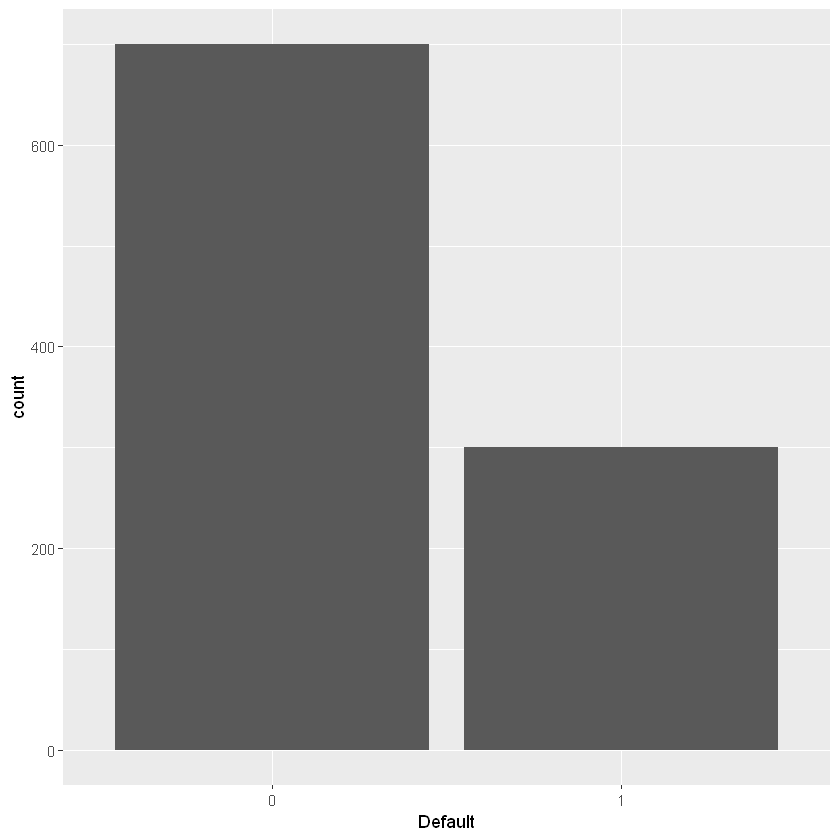

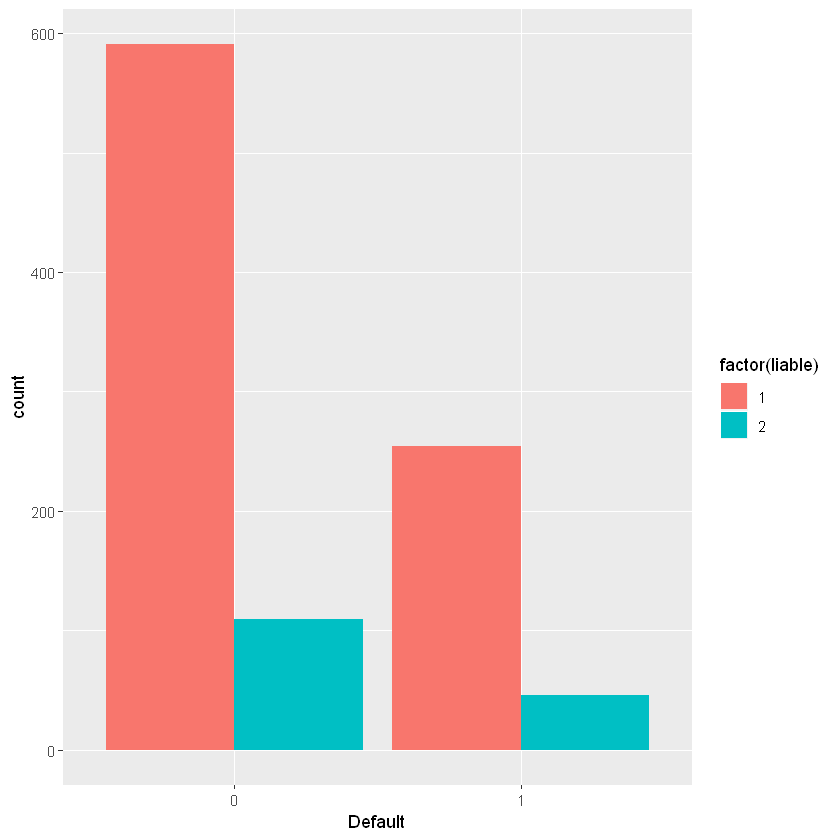

In [8]:
ggplot(creditdata, aes(factor(installment)))+ geom_bar(aes(fill = Default), position = "dodge") + xlab("Installment Rates")
qplot(Default,amount, data = creditdata, geom = "boxplot")
qplot(Default,age, data = creditdata, geom = "boxplot")

ggplot(creditdata, aes(duration, fill=Default))+ geom_density(alpha=.5) 
qplot(Default,residence, data = creditdata, geom = "boxplot")

ggplot(creditdata, aes(Default))+ geom_bar(aposition = "dodge")
ggplot(creditdata, aes(Default))+ geom_bar(aes(fill = factor(liable)), position = "dodge")

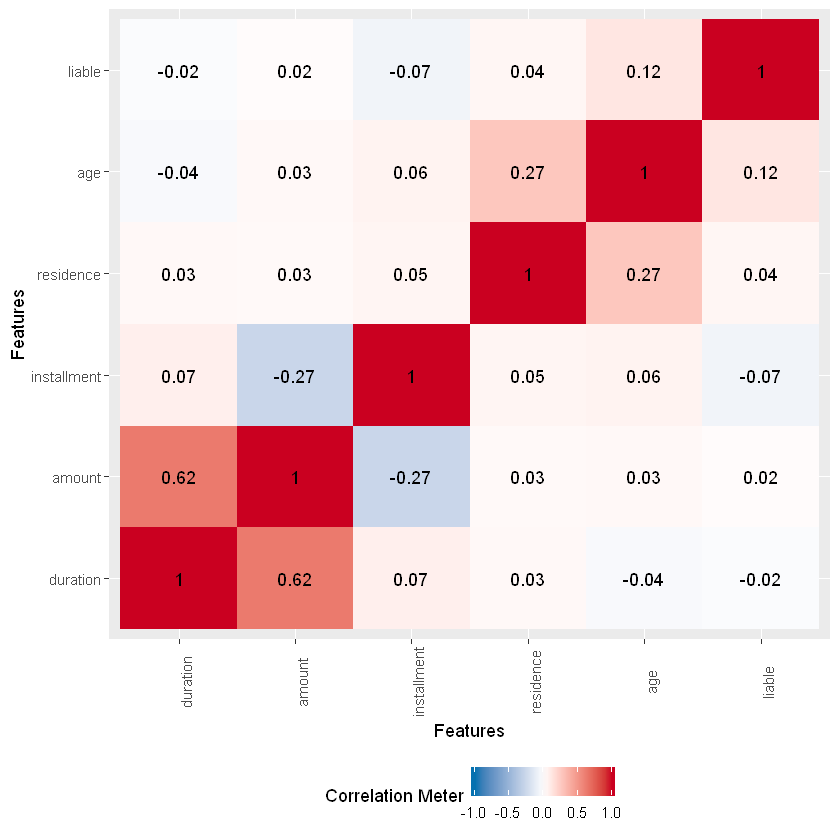

In [9]:
# correlation matrix
plot_correlation(creditdata[c(3,6,9,12,14,19)], maxcat = 5L)

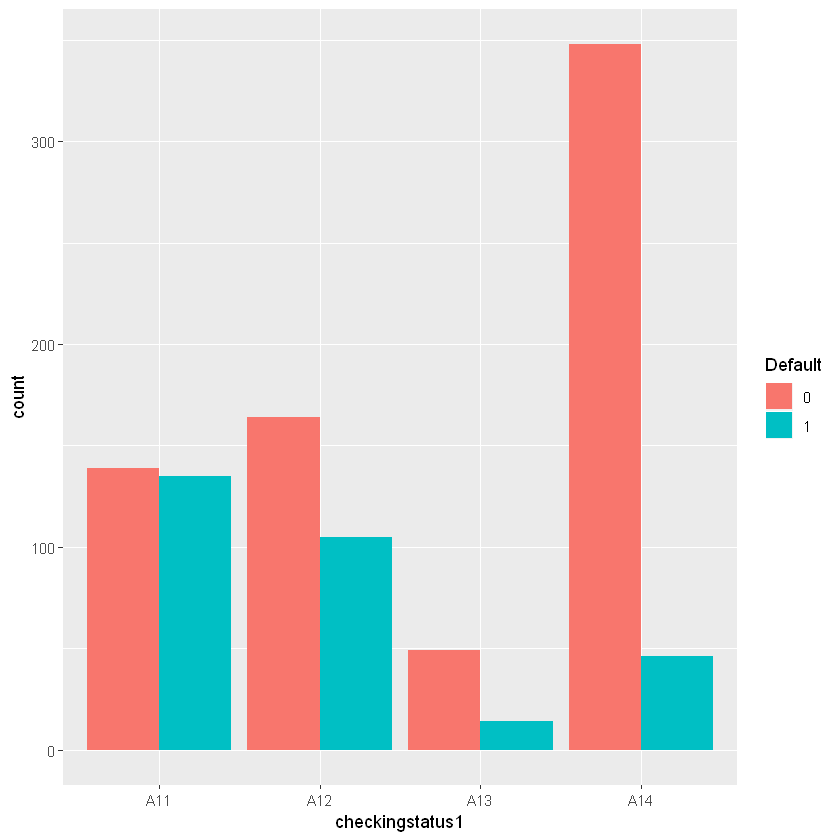

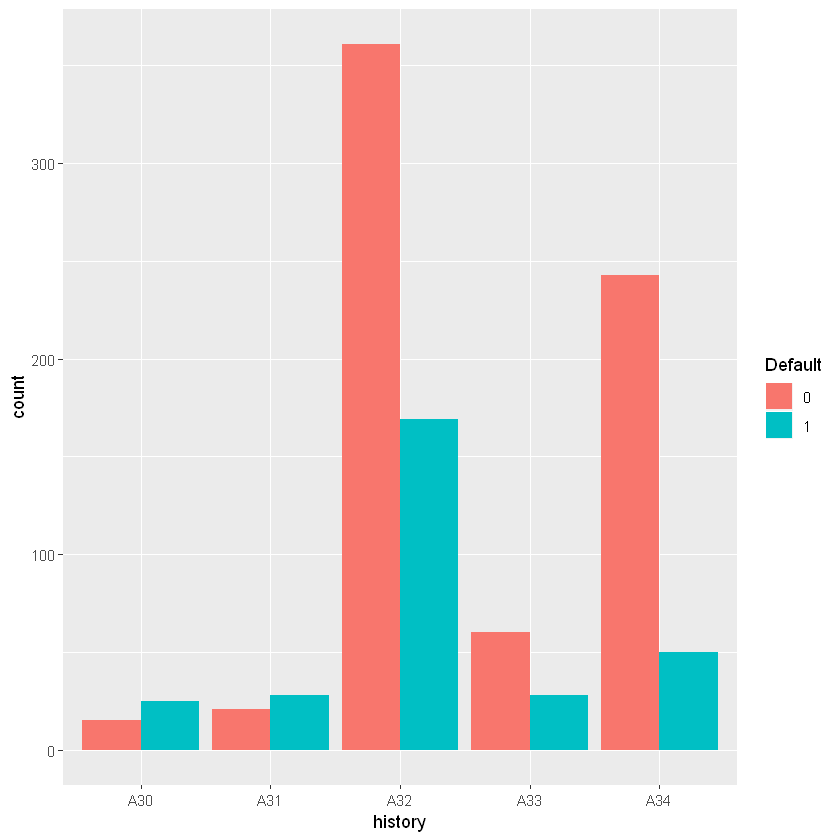

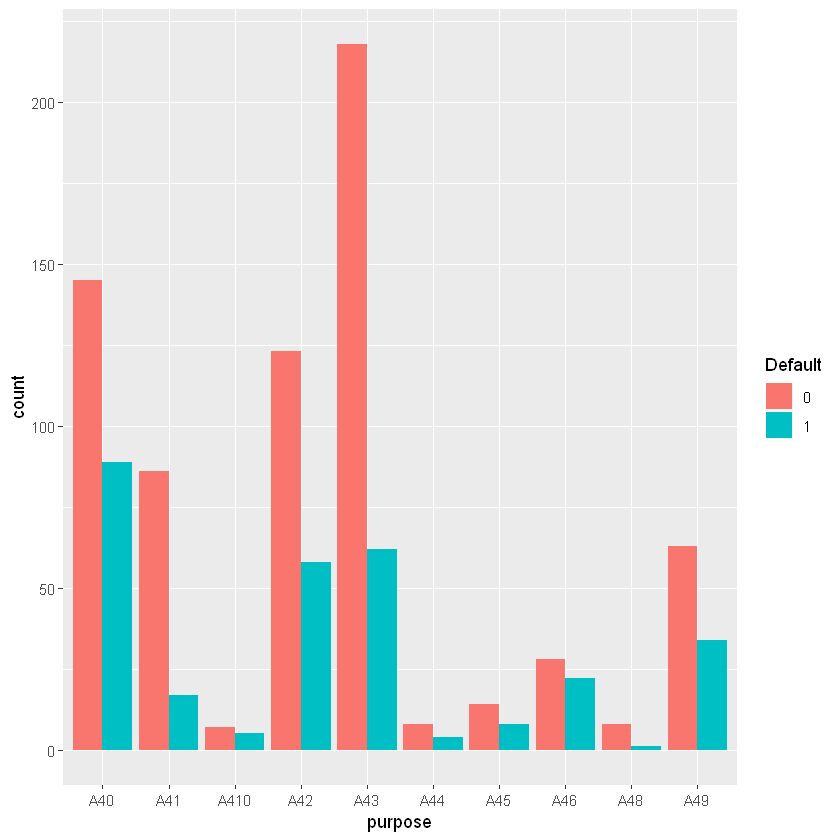

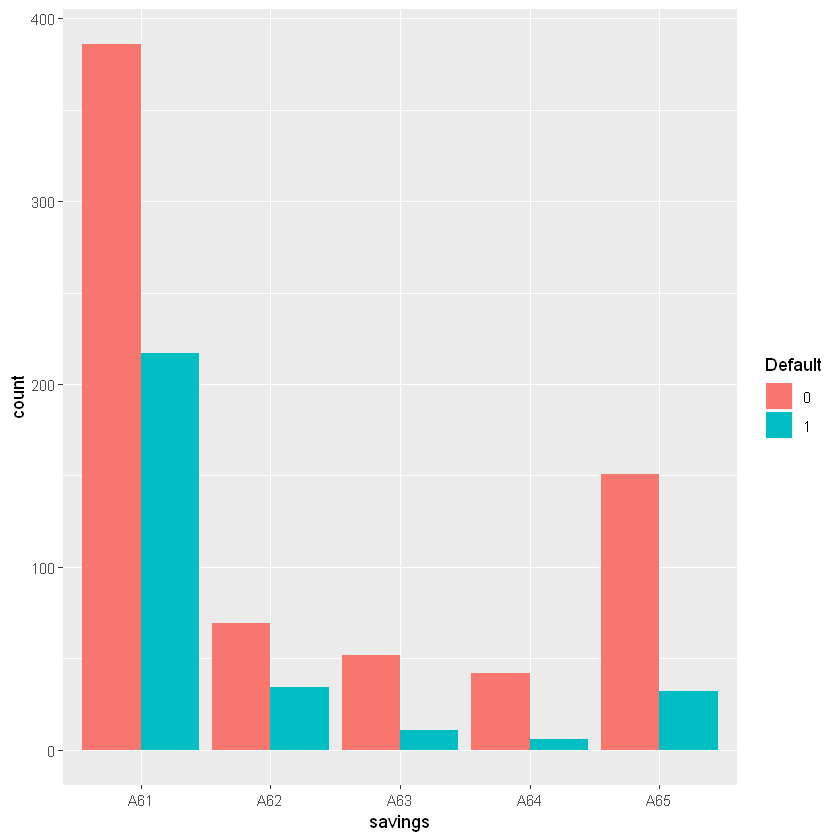

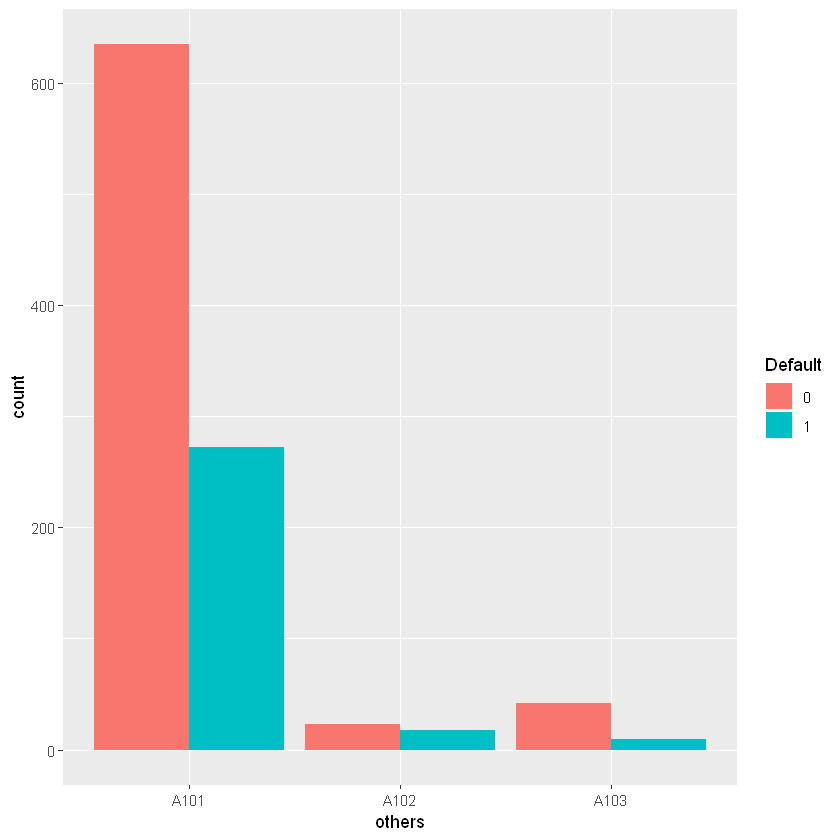

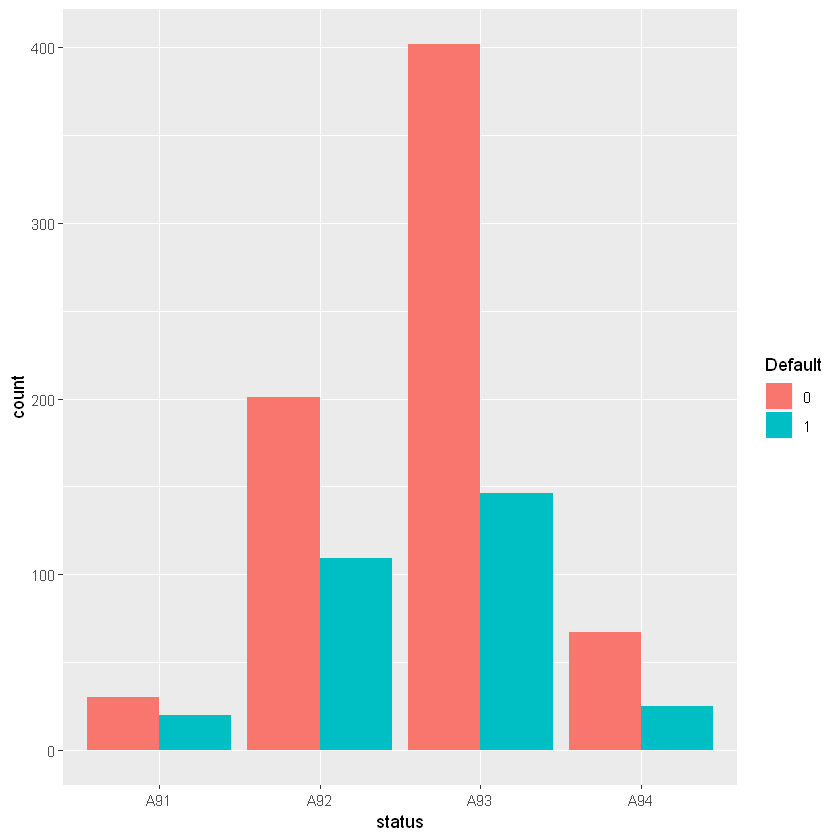

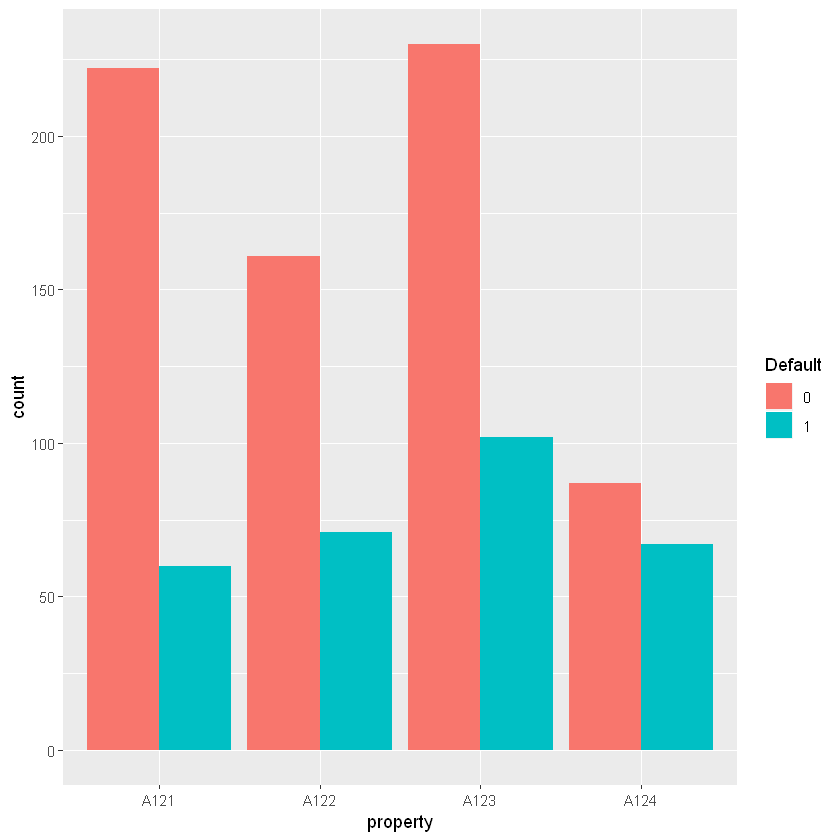

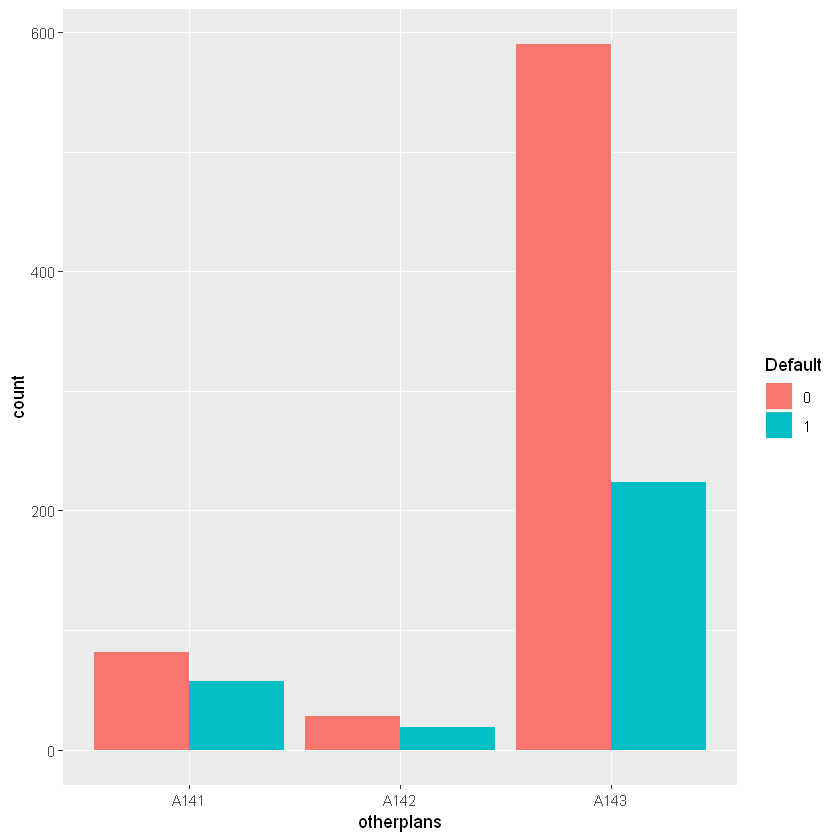

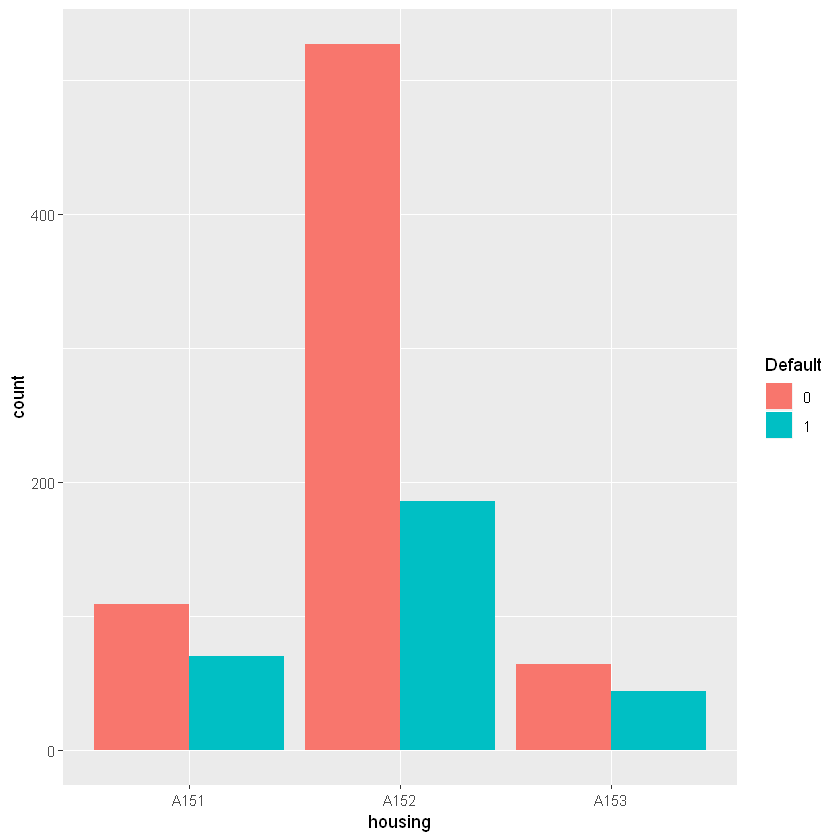

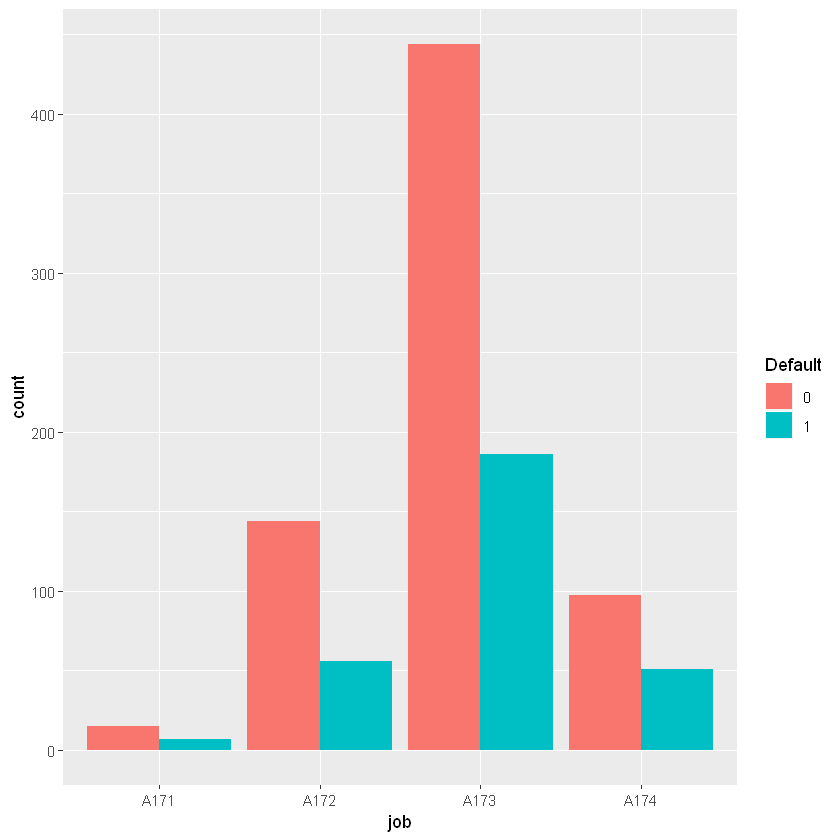

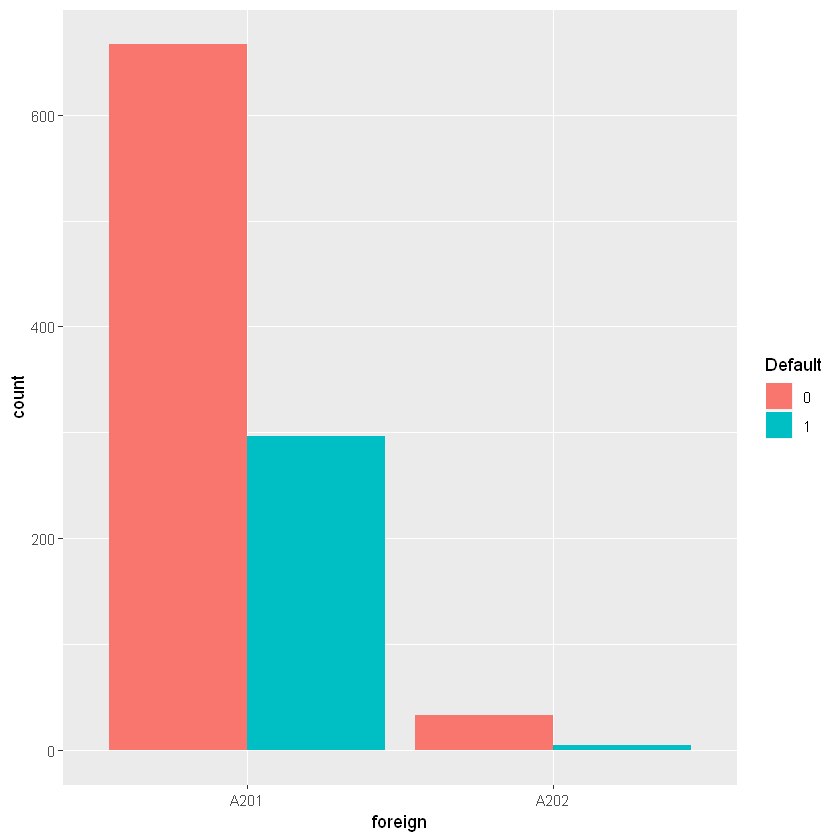

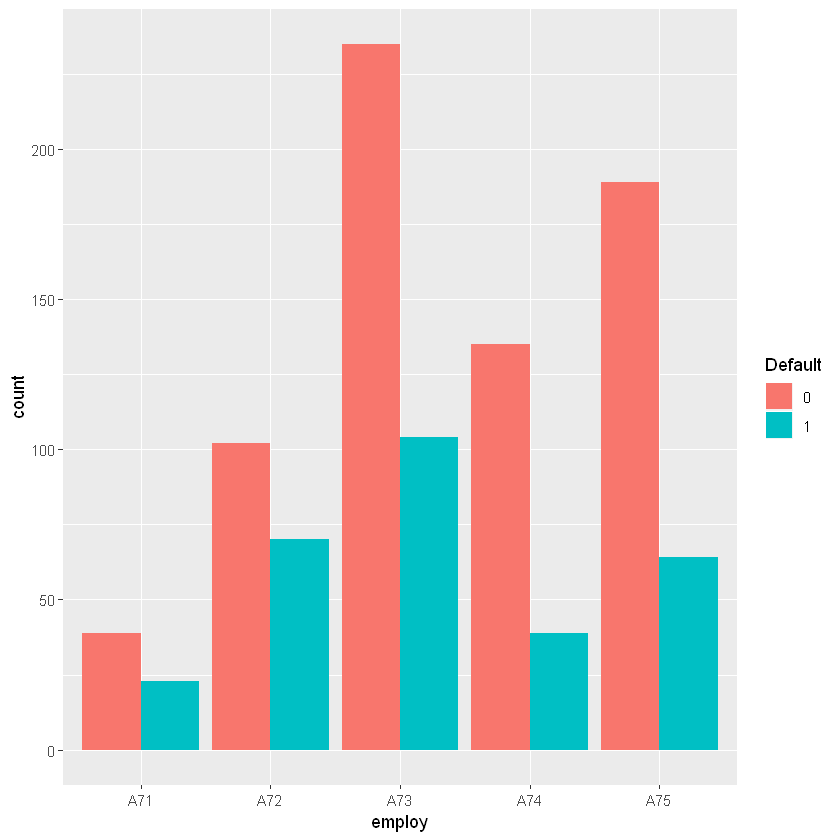

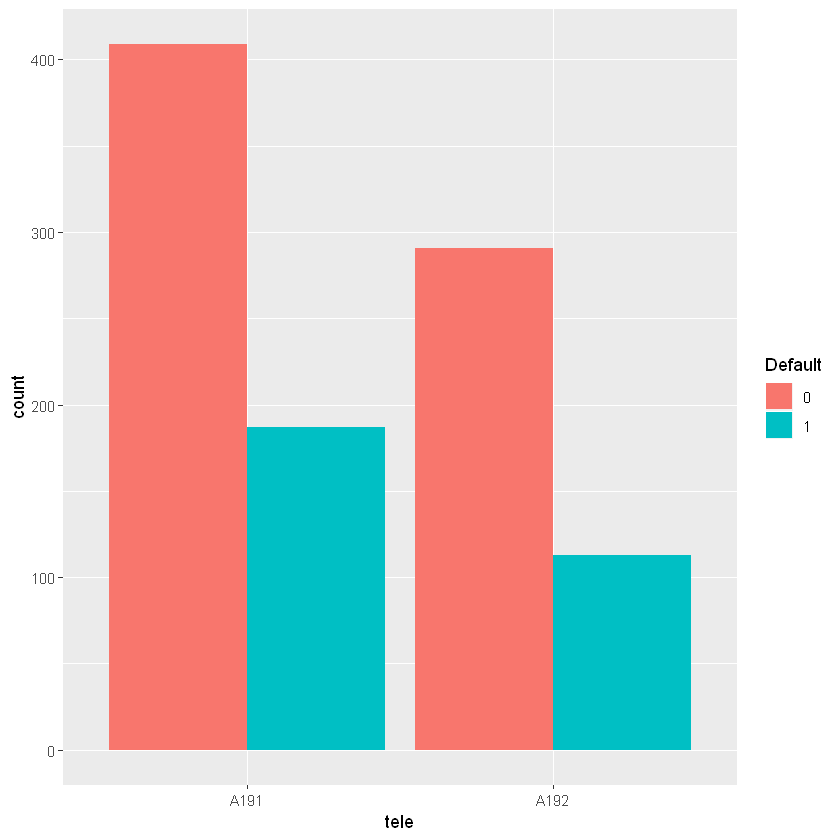

In [10]:
# explore categorical data
ggplot(creditdata, aes(checkingstatus1, ..count..)) + geom_bar(aes(fill = Default), position = "dodge") 
ggplot(creditdata, aes(history, ..count..)) + geom_bar(aes(fill = Default), position = "dodge") 
ggplot(creditdata, aes(purpose, ..count..)) + geom_bar(aes(fill = Default), position = "dodge") 
ggplot(creditdata, aes(savings, ..count..)) + geom_bar(aes(fill = Default), position = "dodge") 
ggplot(creditdata, aes(others, ..count..)) + geom_bar(aes(fill = Default), position = "dodge")  
ggplot(creditdata, aes(status, ..count..)) + geom_bar(aes(fill = Default), position = "dodge") 
ggplot(creditdata, aes(property, ..count..)) + geom_bar(aes(fill = Default), position = "dodge") 
ggplot(creditdata, aes(otherplans, ..count..)) + geom_bar(aes(fill = Default), position = "dodge") 
ggplot(creditdata, aes(housing, ..count..)) + geom_bar(aes(fill = Default), position = "dodge") 
ggplot(creditdata, aes(job, ..count..)) + geom_bar(aes(fill = Default), position = "dodge") 
ggplot(creditdata, aes(foreign, ..count..)) + geom_bar(aes(fill = Default), position = "dodge") 
ggplot(creditdata, aes(employ, ..count..)) + geom_bar(aes(fill = Default), position = "dodge") 
ggplot(creditdata, aes(tele, ..count..)) + geom_bar(aes(fill = Default), position = "dodge") 


In [11]:
# split the data
set.seed(12420424)
in.train <- createDataPartition(creditdata$Default, p=0.8, list=FALSE)
german_credit.train <- creditdata[in.train,]
german_credit.test <- creditdata[-in.train,]

In [12]:
# variable selection
# Stepwise variable selection using AIC
credit.glm0 <- glm(Default ~ ., family = binomial, german_credit.train)
credit.glm.step <- step(credit.glm0, direction = "backward")


Start:  AIC=811.01
Default ~ checkingstatus1 + duration + history + purpose + amount + 
    savings + employ + installment + status + others + residence + 
    property + age + otherplans + housing + cards + job + liable + 
    tele + foreign

                  Df Deviance    AIC
- job              3   710.27 806.27
- cards            3   711.78 807.78
- property         3   712.44 808.44
- housing          2   710.80 808.80
- employ           4   715.25 809.25
- residence        1   709.61 809.61
- liable           1   709.66 809.66
<none>                 709.01 811.01
- tele             1   711.57 811.57
- status           3   715.64 811.64
- age              1   711.93 811.93
- foreign          1   713.95 813.95
- others           2   717.52 815.52
- duration         1   715.80 815.80
- otherplans       2   718.98 816.98
- amount           1   718.11 818.11
- savings          4   724.50 818.50
- installment      1   718.74 818.74
- history          4   725.95 819.95
- purpose       

In [13]:
summary(credit.glm.step)


Call:
glm(formula = Default ~ checkingstatus1 + duration + history + 
    purpose + amount + savings + installment + status + others + 
    age + otherplans + tele + foreign, family = binomial, data = german_credit.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2263  -0.7082  -0.3799   0.6923   2.7670  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)         1.608e+00  8.251e-01   1.949 0.051344 .  
checkingstatus1A12 -3.628e-01  2.408e-01  -1.507 0.131894    
checkingstatus1A13 -9.224e-01  3.882e-01  -2.376 0.017499 *  
checkingstatus1A14 -1.942e+00  2.623e-01  -7.404 1.32e-13 ***
duration            2.516e-02  1.000e-02   2.516 0.011868 *  
historyA31         -6.266e-01  6.195e-01  -1.012 0.311749    
historyA32         -1.190e+00  4.761e-01  -2.500 0.012422 *  
historyA33         -1.118e+00  5.413e-01  -2.065 0.038939 *  
historyA34         -1.695e+00  5.007e-01  -3.386 0.000710 ***
purposeA41         -1.437e+0

In [14]:
# stepwise variable selection using BIC
credit.glm.step.bic <- step(credit.glm0, k = log(nrow(german_credit.train)))


Start:  AIC=1049.92
Default ~ checkingstatus1 + duration + history + purpose + amount + 
    savings + employ + installment + status + others + residence + 
    property + age + otherplans + housing + cards + job + liable + 
    tele + foreign

                  Df Deviance    AIC
- purpose          9   740.96 1021.7
- employ           4   715.25 1029.4
- job              3   710.27 1031.1
- cards            3   711.78 1032.6
- property         3   712.44 1033.3
- status           3   715.64 1036.5
- housing          2   710.80 1038.3
- savings          4   724.50 1038.7
- history          4   725.95 1040.1
- residence        1   709.61 1043.8
- liable           1   709.66 1043.9
- others           2   717.52 1045.1
- tele             1   711.57 1045.8
- age              1   711.93 1046.2
- otherplans       2   718.98 1046.5
- foreign          1   713.95 1048.2
<none>                 709.01 1049.9
- duration         1   715.80 1050.0
- amount           1   718.11 1052.3
- installment  

In [15]:
summary(credit.glm.step.bic)


Call:
glm(formula = Default ~ checkingstatus1 + duration, family = binomial, 
    data = german_credit.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5984  -0.8548  -0.4809   0.9769   2.3311  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -0.80900    0.19997  -4.046 5.22e-05 ***
checkingstatus1A12 -0.45879    0.19986  -2.296  0.02170 *  
checkingstatus1A13 -0.96408    0.35409  -2.723  0.00648 ** 
checkingstatus1A14 -2.05961    0.22897  -8.995  < 2e-16 ***
duration            0.03666    0.00684   5.360 8.34e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 977.38  on 799  degrees of freedom
Residual deviance: 839.30  on 795  degrees of freedom
AIC: 849.3

Number of Fisher Scoring iterations: 4


In [16]:
# Lasso variable selection
# To get variable selection using LASSO, we first create matrix of the dataset.
factor_var <- c(1,2,4,5,7,8,10,11,13,15,16,17,18,20,21)
num_var <- c(3,6,9,12,14,19)
train2 <- german_credit.train
train2[num_var] <- scale(train2[num_var])
train2[factor_var] <- sapply(train2[factor_var] , as.numeric)
X.train <- as.matrix(train2[,2:21])
Y.train <- as.matrix(train2[,1])

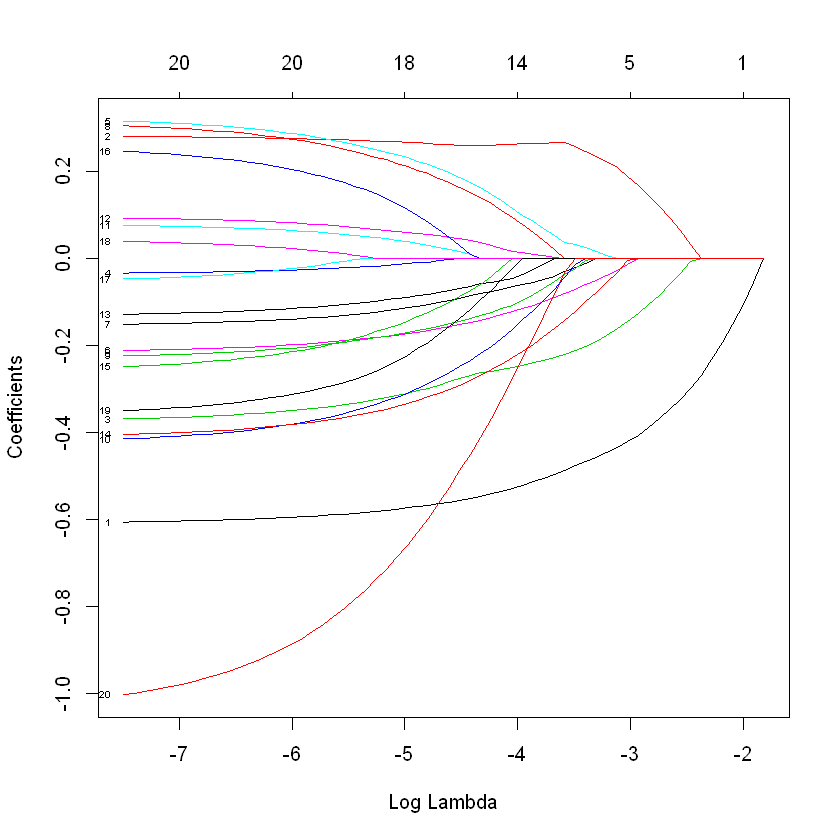

In [17]:
# We fit the LASSO model to our data. From the plot below, we see that as the value of lambda keeps on increasing, the coefficients for the variables tend to 0.
lasso.fit<- glmnet(x=X.train, y=Y.train, family = "binomial", alpha = 1)
plot(lasso.fit, xvar = "lambda", label=TRUE)

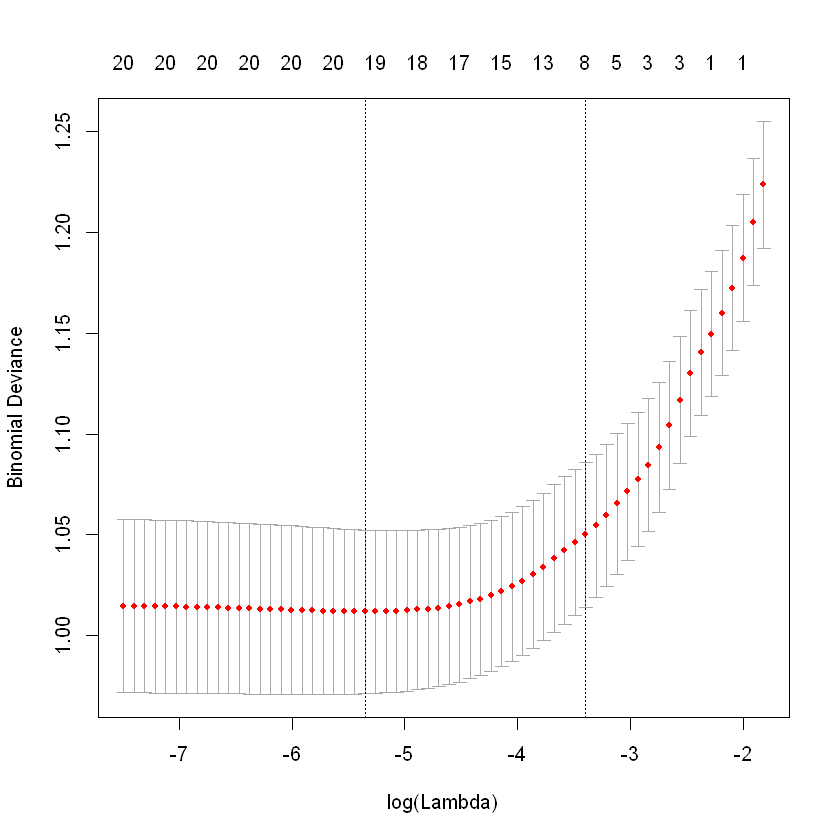

In [18]:
# Using cross validation to find perfect lambda value
cv.lasso<- cv.glmnet(x=X.train, y=Y.train, family = "binomial", alpha = 1, nfolds = 10)
plot(cv.lasso)

In [19]:
cv.lasso$lambda.1se
coef(lasso.fit, s=cv.lasso$lambda.1se)

[1] 0.0334437

21 x 1 sparse Matrix of class "dgCMatrix"
                           1
(Intercept)      1.394985806
checkingstatus1 -0.466208930
duration         0.245704522
history         -0.200888155
purpose          .          
amount           0.025455296
savings         -0.060184929
employ          -0.010413263
installment      .          
status          -0.004068888
others           .          
residence        .          
property         .          
age              .          
otherplans      -0.099223291
housing          .          
cards            .          
job              .          
liable           .          
tele             .          
foreign          .          

In [20]:
# Model 1 - Logistic regression
credit.glm.final <- glm(Default ~ checkingstatus1 + duration + history + amount + savings + otherplans, family = binomial, german_credit.train)
summary(credit.glm.final)


Call:
glm(formula = Default ~ checkingstatus1 + duration + history + 
    amount + savings + otherplans, family = binomial, data = german_credit.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9334  -0.8065  -0.4438   0.8815   2.4795  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)         9.565e-01  5.180e-01   1.847 0.064816 .  
checkingstatus1A12 -4.762e-01  2.181e-01  -2.184 0.028991 *  
checkingstatus1A13 -9.147e-01  3.658e-01  -2.500 0.012416 *  
checkingstatus1A14 -1.862e+00  2.444e-01  -7.618 2.57e-14 ***
duration            3.028e-02  8.858e-03   3.419 0.000630 ***
historyA31         -4.588e-01  5.829e-01  -0.787 0.431161    
historyA32         -1.101e+00  4.487e-01  -2.453 0.014167 *  
historyA33         -1.094e+00  5.193e-01  -2.108 0.035059 *  
historyA34         -1.702e+00  4.726e-01  -3.602 0.000316 ***
amount              4.821e-05  3.851e-05   1.252 0.210577    
savingsA62         -2.265e-01  2.970

      Predicted
Actual  0  1
     0 92 48
     1 13 47

Setting levels: control = 0, case = 1
Setting direction: controls < cases



Call:
roc.default(response = lrdata$obs, predictor = lrdata$prob, plot = TRUE,     print.thres = TRUE, print.auc = TRUE)

Data: lrdata$prob in 140 controls (lrdata$obs 0) < 60 cases (lrdata$obs 1).
Area under the curve: 0.7202

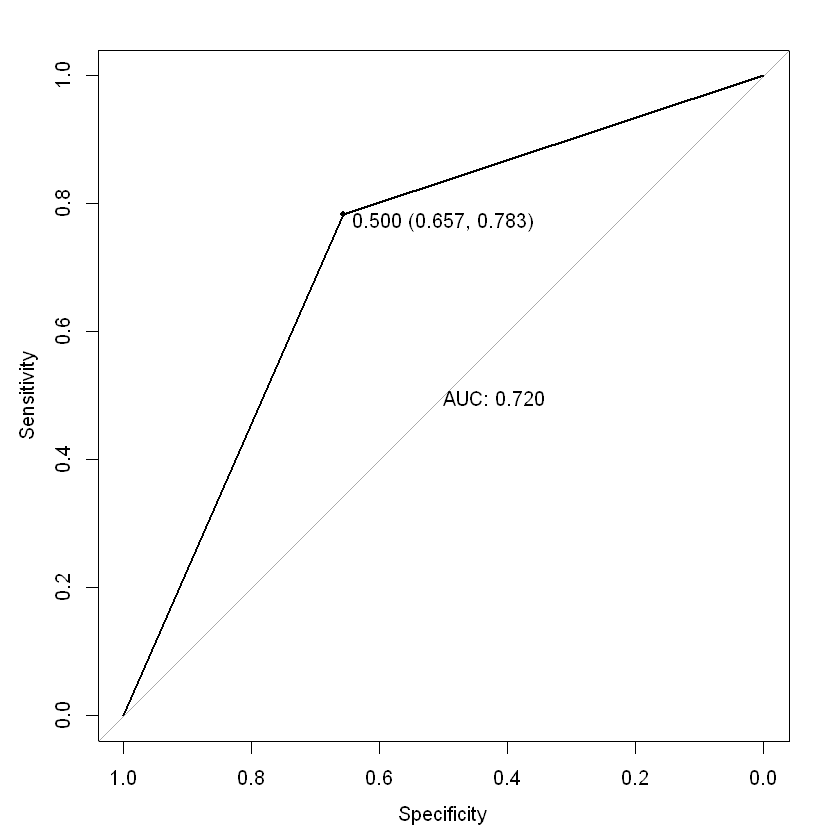

In [21]:
# predict with test dataset
lr.pred <- predict(credit.glm.final, german_credit.test, type = "response")
lr.pred1 <- lr.pred > 0.3
lr.pred1 <- as.numeric(lr.pred1)
# draw confusion matrix
lr.pref <- table(german_credit.test$Default, lr.pred1, dnn = c("Actual", "Predicted")) 
lr.pref
# draw ROC curve
lrdata <- data.frame(prob=lr.pred1, obs=german_credit.test$Default)
roc(lrdata$obs, lrdata$prob, plot=TRUE, print.thres=TRUE, print.auc=TRUE)


CP,nsplit,rel error,xerror,xstd
0.05833333,0,1.0000000,1.0000000,0.05400617
0.05416667,2,0.8833333,0.9833333,0.05374515
0.04166667,3,0.8291667,0.9875000,0.05381113
0.02916667,4,0.7875000,0.9250000,0.05276964
0.01666667,5,0.7583333,0.8708333,0.05177387
0.01000000,7,0.7250000,0.8333333,0.05103104


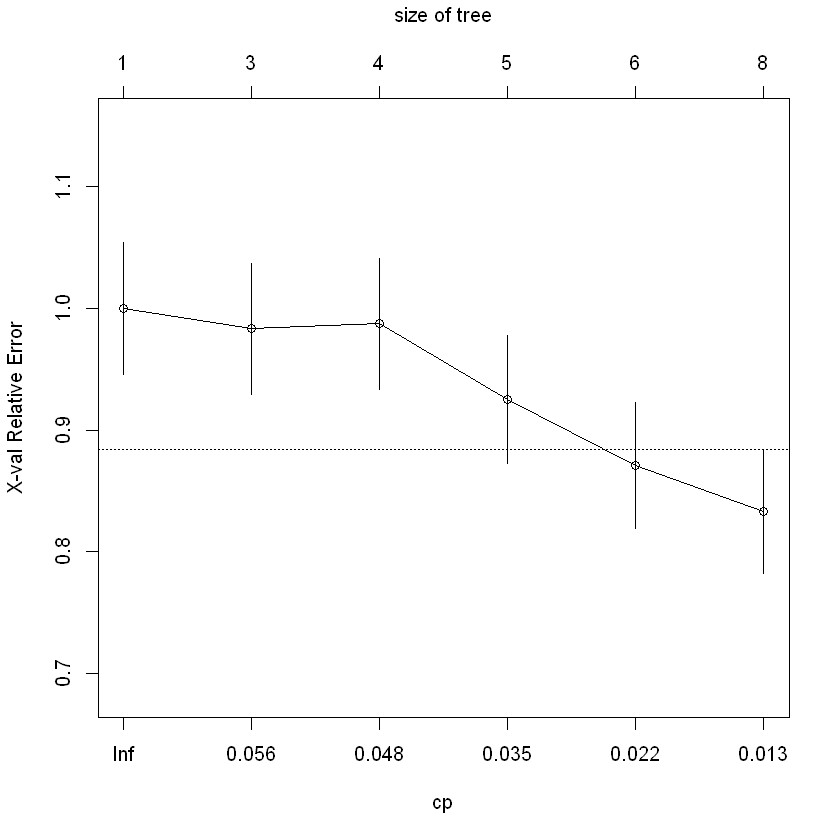

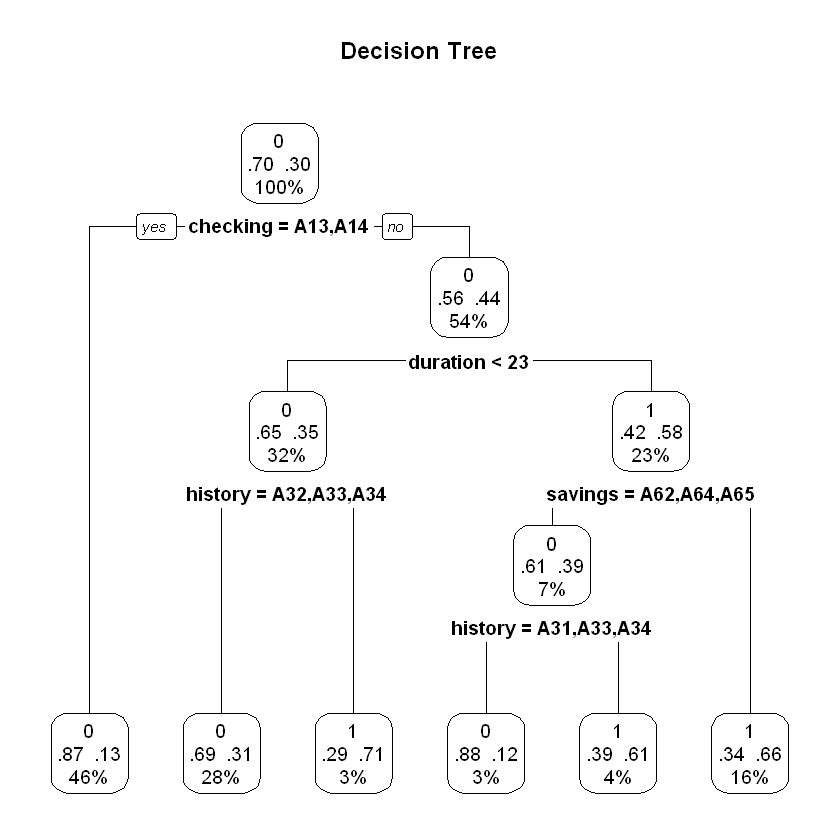

In [22]:
# Model 2 - Decision Tree
set.seed(1234)
dtree <- rpart(Default ~ checkingstatus1 + duration + history + amount + savings + otherplans, data = german_credit.train, method = "class", parms = list(split = "information"))
dtree$cptable
plotcp(dtree)
dtree.pruned <- prune(dtree, cp=.017)
prp(dtree.pruned, type = 2, extra = 104, fallen.leaves = TRUE, main="Decision Tree") 

      Predicted
Actual  0  1
     0 83 57
     1 14 46

Setting levels: control = 0, case = 1
Setting direction: controls < cases



Call:
roc.default(response = dtdata$obs, predictor = dtdata$prob, plot = TRUE,     print.thres = TRUE, print.auc = TRUE)

Data: dtdata$prob in 140 controls (dtdata$obs 0) < 60 cases (dtdata$obs 1).
Area under the curve: 0.6798

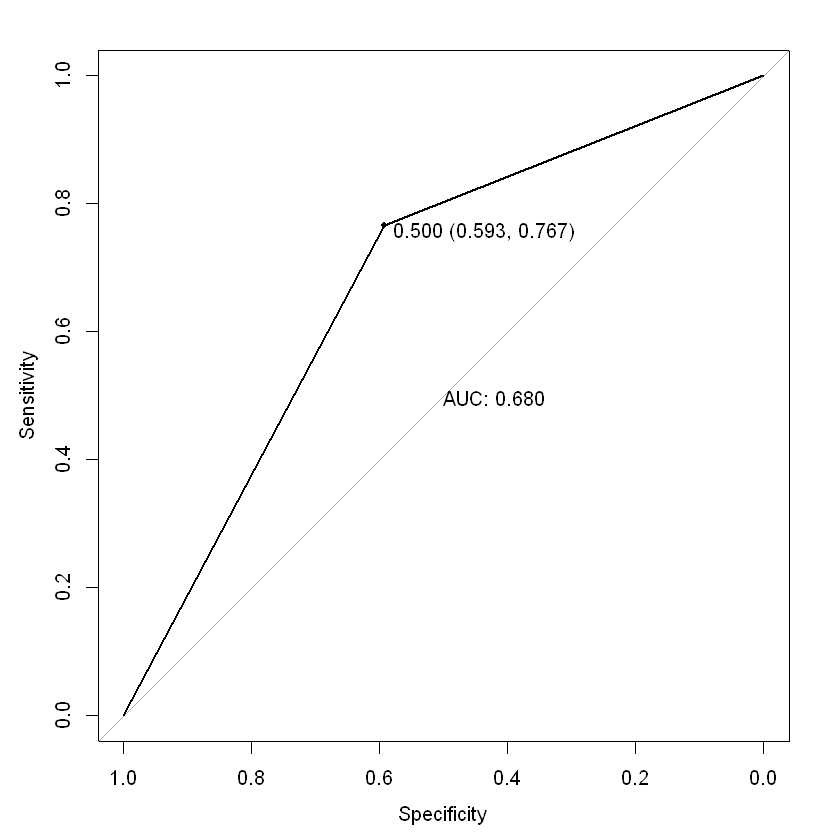

In [23]:
# prediction
dtree.pred <- predict(dtree.pruned, german_credit.test, type="p")
# confusion matrix
dtree.pred <- as.data.frame(dtree.pred)
dtree.pred1 <- dtree.pred$'1' >.25
dtree.pred1 <- as.numeric(dtree.pred1)
dtree.pref <- table(german_credit.test$Default, dtree.pred1, dnn=c("Actual", "Predicted"))
dtree.pref
# ROC 
dtdata <- data.frame(prob=dtree.pred1, obs=german_credit.test$Default)
roc(dtdata$obs, dtdata$prob, plot=TRUE, print.thres=TRUE, print.auc=TRUE)

      Predicted
Actual   0   1
     0 114  26
     1  27  33

Setting levels: control = 0, case = 1
Setting direction: controls < cases


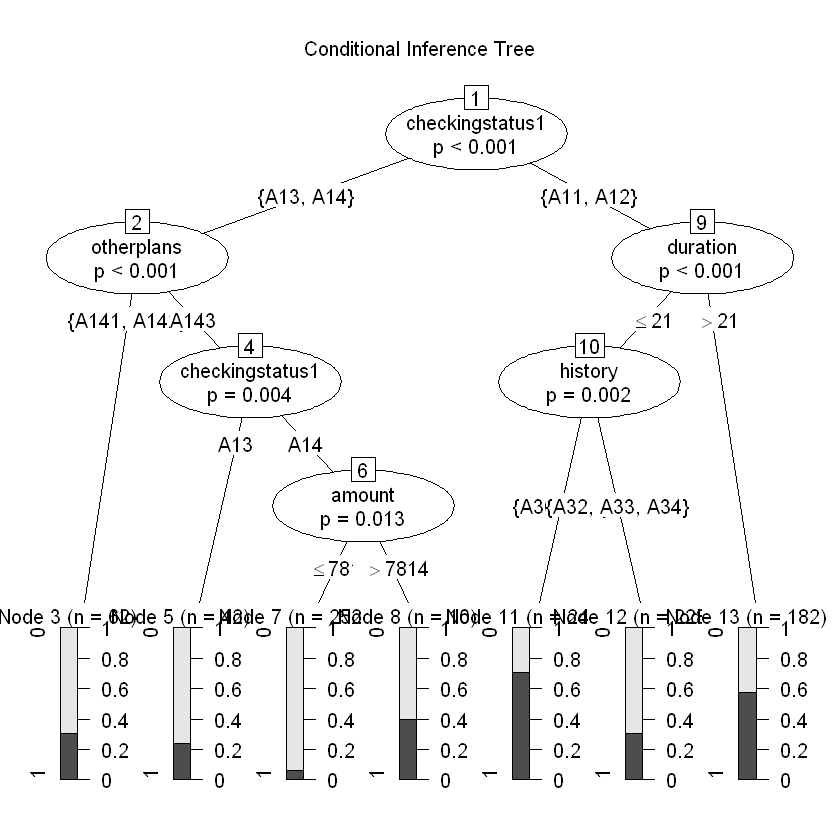


Call:
roc.default(response = ctreedata$obs, predictor = ctreedata$prob,     plot = TRUE, print.thres = TRUE, print.auc = TRUE)

Data: ctreedata$prob in 140 controls (ctreedata$obs 0) < 60 cases (ctreedata$obs 1).
Area under the curve: 0.6821

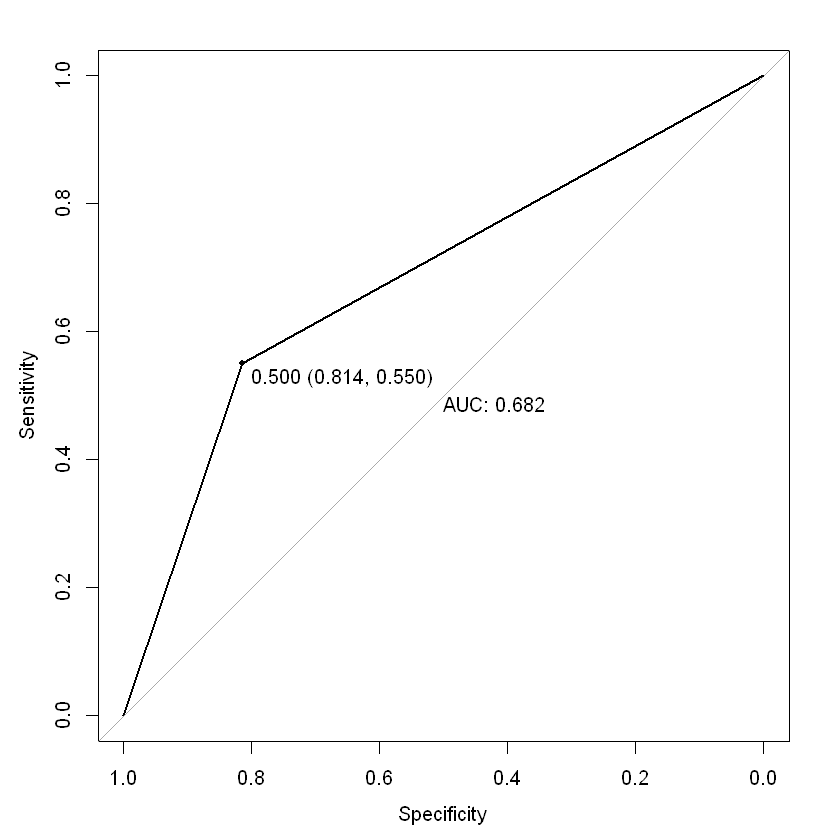

In [24]:
# Model 3 - Conditional Inference tree
fit.ctree <- ctree(Default~checkingstatus1 + duration + history + amount + savings + otherplans, data = german_credit.train)
plot(fit.ctree, main="Conditional Inference Tree")
# prediction
ctree.pred <- predict(fit.ctree, german_credit.test, type="p")
# comfusion matrix
ctree.pred <- as.data.frame(as.numeric(map_chr(ctree.pred,2)))
ctree.pred1 <- ctree.pred[,1] >.4
ctree.pred1 <- as.numeric(ctree.pred1)
ctree.pref <- table(german_credit.test$Default, ctree.pred1,dnn=c("Actual", "Predicted"))
ctree.pref
# ROC
ctreedata <- data.frame(prob=ctree.pred1, obs=german_credit.test$Default)
roc(ctreedata$obs, ctreedata$prob, plot=TRUE, print.thres=TRUE, print.auc=TRUE)

In [25]:
# Model 4 - Random Forest
set.seed(1234)
fit.forest <- randomForest(Default~checkingstatus1 + duration + history + amount + savings + otherplans, data=german_credit.train,importance=TRUE)
fit.forest 


Call:
 randomForest(formula = Default ~ checkingstatus1 + duration +      history + amount + savings + otherplans, data = german_credit.train,      importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 24.25%
Confusion matrix:
    0   1 class.error
0 496  64   0.1142857
1 130 110   0.5416667

In [26]:
importance(fit.forest, type=2)

,MeanDecreaseGini
checkingstatus1,47.70696
duration,53.04609
history,33.20383
amount,94.40970
savings,26.26372
otherplans,16.46735


      Predicted
Actual  0  1
     0 99 41
     1 18 42

Setting levels: control = 0, case = 1
Setting direction: controls < cases



Call:
roc.default(response = rfdata$obs, predictor = rfdata$prob, plot = TRUE,     print.thres = TRUE, print.auc = TRUE)

Data: rfdata$prob in 140 controls (rfdata$obs 0) < 60 cases (rfdata$obs 1).
Area under the curve: 0.7036

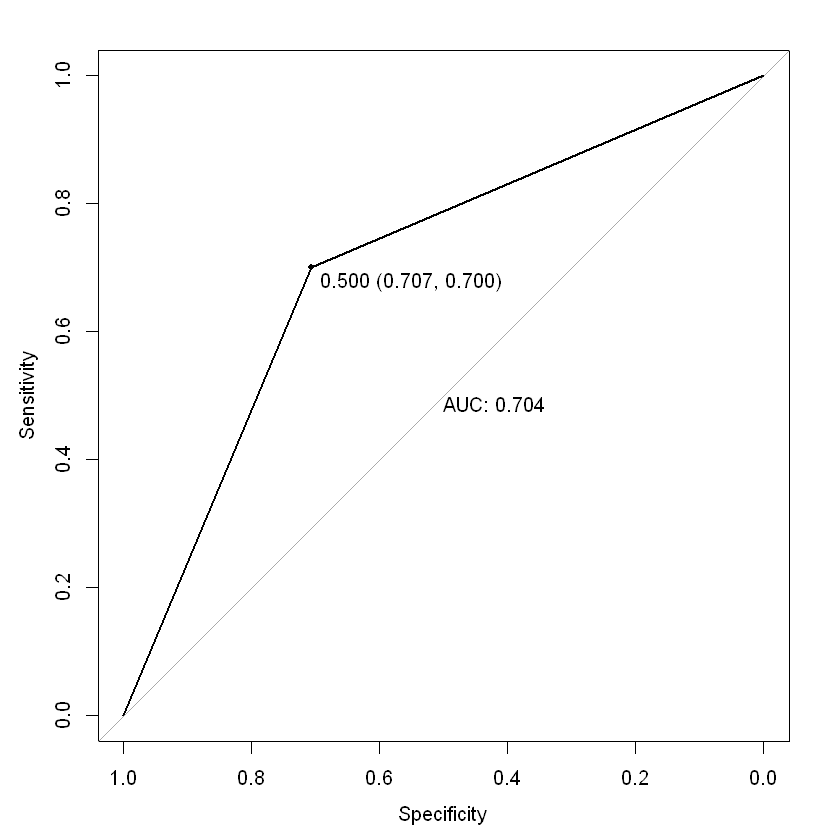

In [27]:
# perdiction
forest.pred <- predict(fit.forest, german_credit.test, type = "p")
# confusion matrix
forest.pred <- as.data.frame(forest.pred)
forest.pred1 <- forest.pred$'1' >.3
forest.pred1 <- as.numeric(forest.pred1)
forest.pref <- table(german_credit.test$Default, forest.pred1, dnn=c("Actual", "Predicted")) 
forest.pref
# ROC
rfdata <- data.frame(prob=forest.pred1, obs=german_credit.test$Default)
roc(rfdata$obs, rfdata$prob, plot=TRUE, print.thres=TRUE, print.auc=TRUE)

In [28]:
# Model 5 - SVM
set.seed(1234)
fit.svm <- svm(Default~checkingstatus1 + duration + history + amount + savings + otherplans, data = german_credit.train, probability=TRUE)
fit.svm


Call:
svm(formula = Default ~ checkingstatus1 + duration + history + amount + 
    savings + otherplans, data = german_credit.train, probability = TRUE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.0625 

Number of Support Vectors:  468


      Predicted
Actual   0   1
     0 100  40
     1  17  43

Setting levels: control = 0, case = 1
Setting direction: controls < cases



Call:
roc.default(response = svmdata$obs, predictor = svmdata$prob,     plot = TRUE, print.thres = TRUE, print.auc = TRUE)

Data: svmdata$prob in 140 controls (svmdata$obs 0) < 60 cases (svmdata$obs 1).
Area under the curve: 0.7155

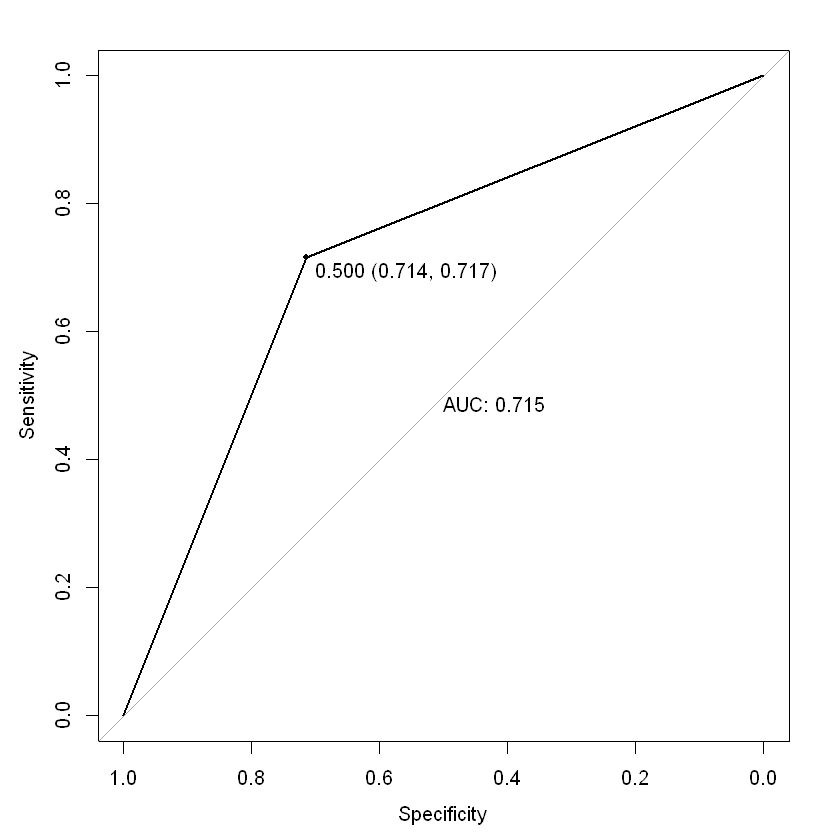

In [29]:
# perdiction
svm.pred <- predict(fit.svm, na.omit(german_credit.test), probability=TRUE)
# confusion matrix
svm.pred <- attr( svm.pred, "probabilities")
svm.pred <- as.data.frame(svm.pred)
svm.pred1 <- svm.pred$'1' >.25
svm.pred1 <- as.numeric(svm.pred1)
svm.pref <- table(na.omit(german_credit.test)$Default, svm.pred1, dnn=c("Actual", "Predicted"))
svm.pref
# ROC
svmdata <- data.frame(prob=svm.pred1, obs=german_credit.test$Default)
roc(svmdata$obs, svmdata$prob, plot=TRUE, print.thres=TRUE, print.auc=TRUE)


In [30]:
# Model 6 - SVM with RBF
set.seed(1234)
#tuned <- tune.svm(Default~checkingstatus1 + duration + history + amount + savings + otherplans, data = german_credit.train,gamma=10^(-6:1),cost=10^(-10:10))
#tuned

In [31]:
fit.svmrbf <- svm(Default~checkingstatus1 + duration + history + amount + savings + otherplans, data = german_credit.train, gamma=.01, cost=10, probability = TRUE)

      Predicted
Actual  0  1
     0 90 50
     1  8 52

Setting levels: control = 0, case = 1
Setting direction: controls < cases



Call:
roc.default(response = svmrbfdata$obs, predictor = svmrbfdata$prob,     plot = TRUE, print.thres = TRUE, print.auc = TRUE)

Data: svmrbfdata$prob in 140 controls (svmrbfdata$obs 0) < 60 cases (svmrbfdata$obs 1).
Area under the curve: 0.7548

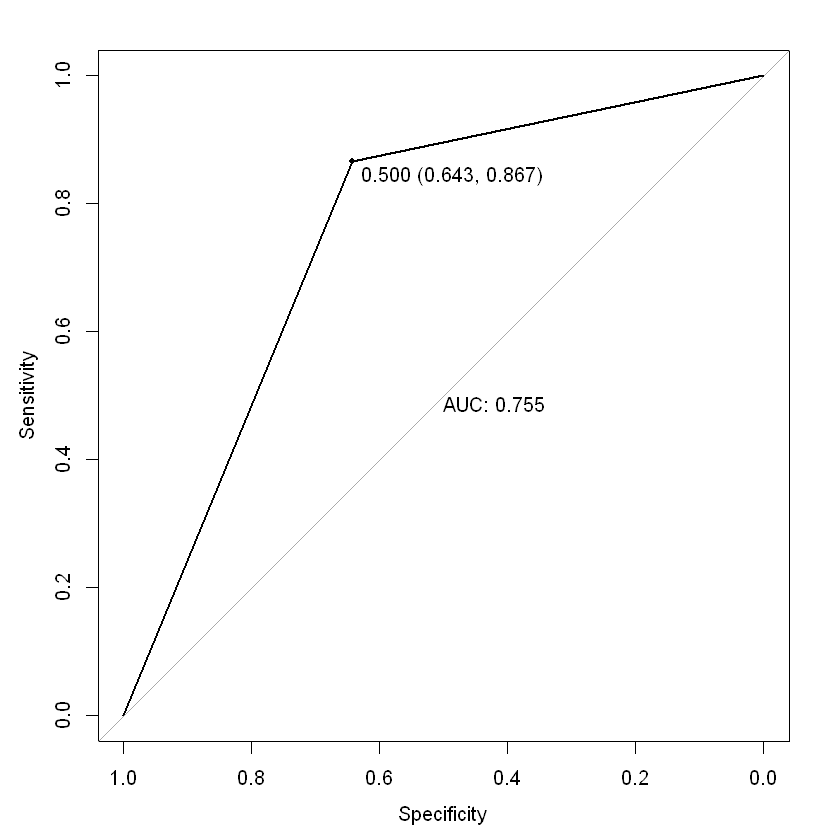

In [32]:
# prediction
svmrbf.pred <- predict(fit.svmrbf, na.omit(german_credit.test), probability = TRUE)
# confusion matrix
svmrbf.pred <- attr(svmrbf.pred, "probabilities")
svmrbf.pred <- as.data.frame(svmrbf.pred)
svmrbf.pred1 <- svmrbf.pred$'1' >.24
svmrbf.pred1 <- as.numeric(svmrbf.pred1)
svmrbf.pref <- table(na.omit(german_credit.test)$Default, svmrbf.pred1, dnn=c("Actual", "Predicted")) 
svmrbf.pref
# ROC
svmrbfdata <- data.frame(prob=svmrbf.pred1, obs=german_credit.test$Default)
roc(svmrbfdata$obs, svmrbfdata$prob, plot=TRUE, print.thres=TRUE, print.auc=TRUE)

In [33]:
# compare the models
# define the function
performance <- function(table, n=2){
 if(!all(dim(table) == c(2,2))) 
 	stop("Must be a 2 x 2 table")
 tn = table[1,1]
 fp = table[1,2]
 fn = table[2,1]
 tp = table[2,2]
 sensitivity = tp/(tp+fn)
 specificity = tn/(tn+fp)
 ppp = tp/(tp+fp)
 npp = tn/(tn+fn)
 hitrate = (tp+tn)/(tp+tn+fp+fn)
 f1 = 2*(ppp*sensitivity)/(ppp+sensitivity)
 result <- paste("Sensitivity/Recall = ", round(sensitivity, n) ,
 	"\nSpecificity = ", round(specificity, n),
 	"\nPrecision = ", round(ppp, n),
 	"\nNegative Predictive Value = ", round(npp, n),
 	"\nF1-score = ", round(f1, n),
 	"\nAccuracy = ", round(hitrate, n), "\n", sep="")
 cat(result)
} 

In [34]:
performance(svmrbf.pref) 

Sensitivity/Recall = 0.87
Specificity = 0.64
Precision = 0.51
Negative Predictive Value = 0.92
F1-score = 0.64
Accuracy = 0.71


In [35]:
performance(svm.pref) 

Sensitivity/Recall = 0.72
Specificity = 0.71
Precision = 0.52
Negative Predictive Value = 0.85
F1-score = 0.6
Accuracy = 0.72


In [36]:
performance(forest.pref)

Sensitivity/Recall = 0.7
Specificity = 0.71
Precision = 0.51
Negative Predictive Value = 0.85
F1-score = 0.59
Accuracy = 0.7


In [37]:
performance(ctree.pref)

Sensitivity/Recall = 0.55
Specificity = 0.81
Precision = 0.56
Negative Predictive Value = 0.81
F1-score = 0.55
Accuracy = 0.74


In [38]:
performance(dtree.pref)

Sensitivity/Recall = 0.77
Specificity = 0.59
Precision = 0.45
Negative Predictive Value = 0.86
F1-score = 0.56
Accuracy = 0.64


In [39]:
performance(lr.pref)

Sensitivity/Recall = 0.78
Specificity = 0.66
Precision = 0.49
Negative Predictive Value = 0.88
F1-score = 0.61
Accuracy = 0.7
